# Overview of `mobile-env:smart-city` for Smart City Simulation and Digital Twin Synchronization

`mobile-env:smart-city` is an open-source Python environment designed for simulating decentralized Metaverse environments. It provides a flexible and extendable platform for experimenting resource optimization with reinforcement learning (RL) and control algorithms in dynamic environments.

By enabling simulations with moving users, stationary sensors, and flexible configurations, `mobile-env:smart-city` allows the users to model realistic scenarios, assess the efficiency of resource utilization and fine-tune algorithms for real-time synchronization between a digital twin and the actual environment.

## Key Features of `mobile-env:smart-city`

* **Flexibility and Customizability**:
   - `mobile-env:smart-city` is written entirely in Python, making it easy to modify and extend.
   - The environment allows the simulation of a smart city scenario with mobile users (UEs), stationary sensors and a single base station (BS).
   - The number of UEs, sensors, their movement patterns, communication properties and the structure of the network can all be customized to suit a variety of experimental needs.

* **Compatibility with Gymnasium**:
   - `mobile-env:smart-city` adheres to the [Gymnasium](https://gymnasium.farama.org/) (formerly [OpenAI Gym](https://gym.openai.com/)) interface. This ensures compatibility with most reinforcement learning libraries and frameworks, allowing users to experiment with different RL algorithms with minimal integration effort.
   - Using the Gymnasium interface allows easy integration with popular RL libraries such as Stable-Baselines3, RLlib, or custom-built agents.

* **Not Limited to RL**:
   - While the environment is designed with RL in mind, `mobile-env:smart-city` is not restricted to RL algorithms. It can also be used to implement and test conventional control policies or simple rule-based benchmark algorithms. This flexibility enables users to benchmark RL algorithms against traditional approaches.

* **Realistic Network Simulation**:
   - The environment includes realistic simulations of mobile user equipment (UEs), cellular network base stations (BS) and sensors. 
   - UEs move dynamically and their communication quality (e.g., signal-to-noise ratio) changes based on their position relative to the base station. 
   - The scenarios are focused on exploring dynamic resource allocation in cellular networks for smart city applications.

* **Extensibility**:
   - Developers can easily extend the functionality of `mobile-env:smart-city` by modifying or adding custom observation spaces, action spaces or reward functions.
   - It allows simulation of dynamic scenarios, for example, by implementing custom movement patterns for UEs, different scheduling policies for base stations or adding new types of observations and rewards based on the needs of the experiment.

## Use Case for `mobile-env:smart-city`

This environment provides a platform for testing and evaluating resource allocation strategies, network control algorithms and Metaverse-related optimizations in a smart city environment. Reinforcement learning agents can be trained and evaluated in the environment to dynamically manage resources such as bandwidth and computational power for multiple devices and sensors. 

Its flexibility, ease of use and compatibility with Gymnasium make it an ideal tool for working on smart city or decentralized Metaverse applications.

## Customized gymnasium environment: `mobile-env:smart-city`

**Demonstration Steps:**

This demonstration consists of the following steps:

1. Installation and usage of `mobile-env:smart-city` with dummy actions
2. Configuration of `mobile-env:smart-city` and adjustment of the observation space

In additional notebooks within this project, you will find implementations of both a baseline scenario and a reinforcement learning (RL) approach for comparison. 

- The **baseline scenario** employs fixed policy splits and conventional control methods to allocate resources, providing a straightforward comparison point for evaluating the benefits of RL. 
- The **RL approach**, on the other hand, uses dynamic decision-making to optimize resource allocation in response to changing network conditions. 

By examining these two approaches side by side, we can assess the effectiveness and adaptability of RL algorithms over traditional static policies, providing insights into their potential for complex, dynamic environments like smart cities.

### Step 1: Installation and usage of `mobile-env:smart-city`

#### Importing necessary libraries:

- `gymnasium` is the core framework for creating and using custom environments
- `mobile_env` is the custom environment that we're demonstrating
- `matplotlib` is used for visualizing the environment's state

In [1]:
# Step 1: Import necessary libraries

import gymnasium as gym

# importing mobile_env automatically registers the predefined scenarios in Gym
import mobile_env

import matplotlib.pyplot as plt

In [2]:
# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

# easy access to the default smart city configuration, parameters and settings
MComSmartCity.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 666,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.ResourceFair,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'handler': mobile_env.handlers.smart_city_handler.MComSmartCityHandler,
 'bs': {'bw': 100000000.0,
  'freq': 2500,
  'tx': 40,
  'height': 50,
  'computational_power': 100},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'sensor': {'height': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09},
 'ue_job': {'job_generation_probability': 0.7,
  'communication_job_lambda_value': 10.0,
  'computation_job_lambda_value': 10.0},
 'sensor_job': {'communication_job_lambda_value': 5.0,
  'computation_job_lambda_value': 5.0},
 'e2e_delay_threshold': 3.0,
 'reward_calculation': {'ue_penalty': -1.0,
  'discount_factor': 0.95

#### Environment Registration

In Gymnasium, registering a new environment is essential when defining a custom environment that can be accessed easily and used with various reinforcement learning frameworks.

In [3]:
from gymnasium.envs.registration import register

# Register the new environment
register(
    id='mobile-smart_city-smart_city_handler-v0',
    entry_point='mobile_env.scenarios.smart_city:MComSmartCity',
    kwargs={'config': {}, 'render_mode': None}
)

/Users/elifohri/Library/Python/3.9/lib/python/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment mobile-smart_city-smart_city_handler-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [4]:
# List all registered environments
env_specs = gym.envs.registry.keys()
print(f"Env specs: {env_specs}")

# Verify if specific environment is listed
assert 'mobile-smart_city-smart_city_handler-v0' in env_specs, "Environment not registered correctly"
print("Environment 'mobile-smart_city-smart_city_handler-v0' registered successfully!")

Env specs: dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'CartPoleJax-v0', 'CartPoleJax-v1', 'PendulumJax-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Jax-Blackjack-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'mobile-smart_city-smart_city_handler-v0'])
Environment 'mobile-smart_city-smart_city_handler-v0' reg

### Step 2: Extending `mobile-env:smart-city` and tracking custom metrics

`mobile-env:smart-city` allows to define and track custom metrics during the training and testing phases in reinforcement learning (RL). This is essential for evaluating and understanding how well RL agents and different baseline policies perform in a decentralized smart city scenario.

It defines an interface for metrics that record values per user equipment and per sensor (e.g. utility per device), basestation (e.g. number of connections per station) or time step (e.g. average utility of device).

**The following key performance indicators (KPIs) are monitored:**

- **Number of connections:** Tracks the total number of active user and sensor connections in the network.
- **Utility metrics:** Measures the utility of user equipments (UEs) and sensors in terms of network performance.
- **Distance to base stations:** Monitors how far UEs and sensors are from the base station, which is essential to understand their connectivity strength.
- **Signal-to-Noise Ratio (SNR):** Measures the quality of the connection between UEs/sensors and base stations.
- **Throughput:** Calculates the data transfer rate for UEs and sensors, as well as for the base station.
- **Bandwidth and computational resource utilization:** Monitors how much of the available bandwidth and computational power is being used by UEs and sensors.

Later, we load the monitored metrics as `pandas` data frames.

#### Environment Creation

Create the simulation environment using the `make()` function, which instantiates the "smart-city" scenario with the configuration specified by the config parameter.

In [5]:
# create a small mobile environment for a single, centralized control agent
# pass rgb_array as render mode so the env can be rendered inside the notebook
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 20 sensors and 1 cells.


#### Environment Data

In [6]:
obs, info = env.reset()
print("obs:", obs)
print("info:", info)

print("\nMetadata")
print("metadata:", env.metadata)

print("\nRender Modes")
print("render modes:", env.render_mode)

print("\nSpec:")
print("spec:", env.spec)

print("\nAction Space")
print("action space:", env.action_space)
print("action space shape:", env.action_space.shape)
print("simple action:", env.action_space.sample())

print("\nObservation Space")
print("observation space:", env.observation_space)
print("observation space shape:", env.observation_space.shape)
print("simple observation:", env.observation_space.sample())

print("\nReward Range")
print("reward range:", env.reward_range)


obs: [0. 0. 0. 0.]
info: {'time': 0.0, 'reward': 0, 'delayed UE jobs': 0, 'aori': {0: None, 1: None, 2: None, 3: None, 4: None}, 'aosi': {0: None, 1: None, 2: None, 3: None, 4: None}, 'bs trans. ue': {0: 0}, 'bs trans. ss': {0: 0}, 'bs accomp. us': {0: 0}, 'bs accomp. ss': {0: 0}}

Metadata
metadata: {'render_modes': ['rgb_array', 'human']}

Render Modes
render modes: rgb_array

Spec:
spec: EnvSpec(id='mobile-smart_city-smart_city_handler-v0', entry_point='mobile_env.scenarios.smart_city:MComSmartCity', reward_threshold=None, nondeterministic=False, max_episode_steps=None, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'config': {}, 'render_mode': 'rgb_array'}, namespace=None, name='mobile-smart_city-smart_city_handler', version=0, additional_wrappers=(), vector_entry_point=None)

Action Space
action space: Box(0.0, 1.0, (2,), float32)
action space shape: (2,)
simple action: [0.26302347 0.16407748]

Observation Space
observation s

### Step 3: Demo with Dummy Actions

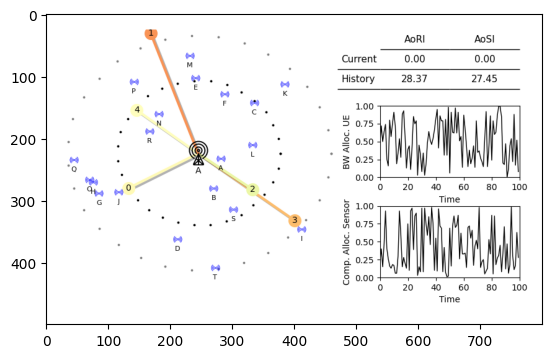

In [7]:
from IPython import display

done = False
obs, info = env.reset()

for step in range(100):
    # here, use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    #dummy_action = (0.0, 0.0)
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True) 
    
plt.close()

In [8]:
# load all tracked results as pandas data frames
scalar_results, kpi_results, ue_results, bs_results, ss_results = env.monitor.load_results()

# show general results
scalar_results

number UE connections  number sensor conncections  \
Time Step                                                      
0                              5                          20   
1                              5                          20   
2                              5                          20   
3                              5                          20   
4                              5                          20   
...                          ...                         ...   
95                             5                          20   
96                             5                          20   
97                             5                          20   
98                             5                          20   
99                             5                          20   

           total traffic request ue  total traffic request sensor  \
Time Step                                                           
0                         40.552113                     71.715016   
1                         47.238530                    151.858149   
2                         47.893536                    214.284371   
3                         68.628363                    306.437537   
4                         91.952349                    384.894923   
...                             ...                           ...   
95                       705.056502                   6450.779716   
96                       716.387253                   6540.057634   
97                       753.071882                   6580.136232   
98                       758.759813                   6640.360238   
99                       772.635580                   6690.023593   

           delayed UE packets  delayed sensor packets  mean utility  \
Time Step                                                             
0                           0                       0      0.114105   
1                           0                       0      0.222505   
2                           0                       0      0.154537   
3                           0                       0      0.226249   
4                           1                       0      0.272267   
...                       ...                     ...           ...   
95                          1                       9      0.116787   
96                          0                       4      0.408909   
97                          1                      11      0.036079   
98                          3                       4      0.267909   
99                          0                       9     -0.153260   

           mean utility sensor  mean datarate  mean datarate sensor  
Time Step                                                            
0                     0.057838       3.486804              6.812097  
1                    -0.080538       5.962122              3.601885  
2                     0.042320       4.396938              6.342292  
3                    -0.030998       6.575424              4.524900  
4                    -0.103722       8.519451              3.237147  
...                        ...            ...                   ...  
95                    0.136124       2.861021              9.940792  
96                   -0.274139      10.546357              1.476823  
97                    0.148619       1.863074             10.561480  
98                    0.035154       5.276230              6.136390  
99                    0.169756       0.741973             11.701019  

[100 rows x 10 columns]

In [9]:
kpi_results

bw allocation UE  bw allocation sensor  comp. allocation UE  \
Time Step                                                                
0                      0.46                  0.54                 0.22   
1                      0.72                  0.28                 0.40   
2                      0.50                  0.50                 0.15   
3                      0.64                  0.36                 0.47   
4                      0.74                  0.26                 0.93   
...                     ...                   ...                  ...   
95                     0.22                  0.78                 0.30   
96                     0.88                  0.12                 0.11   
97                     0.17                  0.83                 0.17   
98                     0.52                  0.48                 0.63   
99                     0.08                  0.92                 0.28   

           comp. allocation sensor  total delayed packets  reward  \
Time Step                                                           
0                             0.78                      0   10.00   
1                             0.60                      0    0.00   
2                             0.85                      0    0.00   
3                             0.53                      0   10.00   
4                             0.07                      1    8.50   
...                            ...                    ...     ...   
95                            0.70                      1    8.02   
96                            0.89                      0    0.00   
97                            0.83                      1   -1.00   
98                            0.37                      3   15.07   
99                            0.72                      0    0.00   

           reward cumulative  total aori  total aosi  total throughput ue  \
Time Step                                                                   
0                      10.00         0.0         0.0            16.447887   
1                      10.00         0.0         0.0             7.313583   
2                      10.00         0.0         0.0             5.344994   
3                      20.00         0.0         0.0            20.265173   
4                      28.50         4.0         4.0            22.676014   
...                      ...         ...         ...                  ...   
95                    840.42        71.0        71.0             7.003472   
96                    840.42         0.0         0.0            27.669249   
97                    839.42        17.0        17.0             9.315371   
98                    854.50        96.0        96.0            21.312069   
99                    854.50         0.0         0.0             2.124233   

           total throughput sensor  total traffic request ue  \
Time Step                                                      
0                        30.284984                 40.552113   
1                        18.856868                 47.238530   
2                        36.573778                 47.893536   
3                        24.846833                 68.628363   
4                        21.542615                 91.952349   
...                            ...                       ...   
95                       49.516489                705.056502   
96                       14.722082                716.387253   
97                       47.921402                753.071882   
98                       35.775994                758.759813   
99                       51.336645                772.635580   

           total traffic request sensor  
Time Step                                
0                             71.715016  
1                            151.858149  
2                            214.284371  
3                            306.437537  
4                            384.894923  
...                  

In [10]:
ue_results

Metric           AoRI  AoSI  distance UE-station  traffic request  \
Time Step UE ID                                                     
0         0       NaN   NaN            99.946785     1.226328e+01   
          1       0.0   0.0            43.472946     0.000000e+00   
          2       NaN   NaN           101.735100     7.285700e+00   
          3       NaN   NaN            75.488173     1.103199e+01   
          4       NaN   NaN            92.039596     9.971134e+00   
...               ...   ...                  ...              ...   
99        0       NaN   NaN            56.554186     4.788392e+02   
          1       NaN   NaN           104.867118     1.407832e+02   
          2       NaN   NaN            47.216607    -3.019807e-14   
          3       NaN   NaN            86.227001     1.219764e+02   
          4       NaN   NaN            54.824342     3.103683e+01   

Metric           user datarate  user queue size  user throughput  user utility  
Time Step UE ID                                                                 
0         0           0.736716              1.0         0.736716     -0.066350  
          1          12.986133              0.0        12.000000      0.556740  
          2           0.714300              1.0         0.714300     -0.073060  
          3           1.968005              1.0         1.968005      0.147013  
          4           1.028866              1.0         1.028866      0.006179  
...                        ...              ...              ...           ...  
99        0           0.841656             49.0         0.841656     -0.037433  
          1           0.109823             13.0         0.109823     -0.479653  
          2           1.585630              0.0         0.000000      0.100101  
          3           0.207324             12.0         0.207324     -0.341675  
          4           0.965429              3.0         0.965429     -0.007640  

[500 rows x 8 columns]

In [11]:
ss_results

Metric               distance sensor-station  sensor datarate  \
Time Step Sensor ID                                             
0         0                        16.492423        97.094562   
          1                        30.083218        12.753298   
          2                        57.280014         1.449102   
          3                        70.611614         0.714833   
          4                        61.032778         1.169564   
...                                      ...              ...   
99        15                       74.027022         1.046810   
          16                       89.140339         0.558964   
          17                       39.357337         8.839846   
          18                       51.478151         3.570061   
          19                       92.779308         0.488314   

Metric               sensor queue size  sensor throughput  sensor utility  \
Time Step Sensor ID                                                         
0         0                        0.0           1.000000        0.993597   
          1                        0.0           4.000000        0.552811   
          2                        1.0           1.449102        0.080549   
          3                        1.0           0.714833       -0.072898   
          4                        1.0           1.169564        0.034012   
...                                ...                ...             ...   
99        15                      90.0           1.046810        0.009934   
          16                      95.0           0.558964       -0.126308   
          17                       7.0           8.839846        0.473222   
          18                      61.0           3.570061        0.276338   
          19                      95.0           0.488314       -0.155650   

Metric               traffic request  
Time Step Sensor ID                   
0         0                 0.000000  
          1                 0.000000  
          2                 4.550898  
          3                 1.285167  
          4                 0.830436  
...                              ...  
99        15              451.327836  
          16              467.272790  
          17               36.873296  
          18              325.311951  
          19              468.030146  

[2000 rows x 6 columns]

In [12]:
bs_results

Metric           queue size accomplished UE jobs  \
Time Step BS ID                                    
0         0                                    1   
1         0                                    1   
2         0                                    1   
3         0                                    2   
4         0                                    4   
...                                          ...   
95        0                                  271   
96        0                                  271   
97        0                                  272   
98        0                                  277   
99        0                                  277   

Metric           queue size accomplished sensor jobs  \
Time Step BS ID                                        
0         0                                        4   
1         0                                        8   
2         0                                       14   
3         0                                       20   
4         0                                       20   
...                                              ...   
95        0                                      633   
96        0                                      639   
97        0                                      652   
98        0                                      658   
99        0                                      669   

Metric           queue size transferred UE jobs  \
Time Step BS ID                                   
0         0                                   0   
1         0                                   0   
2         0                                   0   
3         0                                   0   
4         0                                   0   
...                                         ...   
95        0                                   0   
96        0                                   2   
97        0                                   2   
98        0                                   0   
99        0                                   0   

Metric           queue size transferred sensor jobs  
Time Step BS ID                                      
0         0                                       0  
1         0                                       0  
2         0                                       0  
3         0                                       0  
4         0                                       2  
...                                             ...  
95        0                                       4  
96        0                                       0  
97        0                                       0  
98        0                                       0  
99        0                                       0  

[100 rows x 4 columns]

In [13]:
data = kpi_results.agg(['mean', 'min', 'max'])
data

bw allocation UE  bw allocation sensor  comp. allocation UE  \
mean            0.5091                0.4909                0.425   
min             0.0000                0.0000                0.010   
max             1.0000                1.0000                0.990   

      comp. allocation sensor  total delayed packets   reward  \
mean                    0.575                   1.65   8.5442   
min                     0.010                   0.00  -9.0000   
max                     0.990                   9.00  45.6200   

      reward cumulative  total aori  total aosi  total throughput ue  \
mean           386.7851       28.37       27.45            28.003644   
min             10.0000        0.00        0.00             0.199891   
max            854.5000      223.00      223.00           115.622979   

      total throughput sensor  total traffic request ue  \
mean                33.839764                408.921088   
min                  1.189915                 40.552113   
max                 62.113151                772.635580   

      total traffic request sensor  
mean                   3440.651015  
min                      71.715016  
max                    6690.023593

In [14]:
data = ue_results.reset_index()
data = data.groupby('UE ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric       AoRI                    AoSI              distance UE-station  \
             mean   min    max       mean   min    max                mean   
UE ID                                                                        
0       68.375000  14.0  205.0  68.000000  14.0  205.0           81.330213   
1        4.432432   0.0   15.0   5.000000   0.0   18.0           47.964568   
2       16.422222   0.0   70.0  15.377778   0.0   66.0           43.210365   
3        4.826087   0.0   17.0   5.347826   0.0   19.0           51.769772   
4       11.884615   0.0   68.0  10.269231   0.0   63.0           46.767755   

Metric                        traffic request  ... user datarate  \
              min         max            mean  ...           max   
UE ID                                          ...                 
0       56.554186   99.946785      278.180952  ...      9.441836   
1       13.257969  106.225573       22.533179  ...   1512.451078   
2        5.406402  101.735100       46.080551  ...  25797.511880   
3       31.935622   86.227001       20.316667  ...     80.541284   
4       26.218494   92.039596       41.809739  ...    145.934133   

Metric user queue size            user throughput                       \
                  mean  min   max            mean       min        max   
UE ID                                                                    
0                27.87  1.0  49.0        2.021608  0.021432   9.441836   
1                 2.14  0.0  13.0        5.422168  0.000000  17.000000   
2                 5.46  0.0  20.0        6.780000  0.000000  42.852645   
3                 2.43  0.0  12.0        5.850236  0.000000  18.000000   
4                 4.58  0.0  17.0        7.929632  0.000000  49.555636   

Metric user utility                      
               mean       min       max  
UE ID                                    
0          0.060455 -0.834468  0.487528  
1          0.535690 -1.000000  1.000000  
2          0.568400 -0.468165  1.000000  
3          0.427655 -1.000000  0.953009  
4          0.520965 -0.652205  1.000000  

[5 rows x 24 columns]

In [15]:
data = ss_results.reset_index()
data = data.groupby('Sensor ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric    distance sensor-station                       sensor datarate  \
                             mean        min        max            mean   
Sensor ID                                                                 
0                       16.492423  16.492423  16.492423       88.696803   
1                       30.083218  30.083218  30.083218       11.650259   
2                       57.280014  57.280014  57.280014        1.323768   
3                       70.611614  70.611614  70.611614        0.653007   
4                       61.032778  61.032778  61.032778        1.068408   
5                       51.623638  51.623638  51.623638        1.880644   
6                       77.878110  77.878110  77.878110        0.469089   
7                       78.447435  78.447435  78.447435        0.457691   
8                       95.900991  95.900991  95.900991        0.232238   
9                       64.884513  64.884513  64.884513        0.868918   
10                      83.546394  83.546394  83.546394        0.370007   
11                      39.623226  39.623226  39.623226        4.595573   
12                      79.227520  79.227520  79.227520        0.442649   
13                      42.520583  42.520583  42.520583        3.621024   
14                      80.777472  80.777472  80.777472        0.414613   
15                      74.027022  74.027022  74.027022        0.556722   
16                      89.140339  89.140339  89.140339        0.297272   
17                      39.357337  39.357337  39.357337        4.701267   
18                      51.478151  51.478151  51.478151        1.898654   
19                      92.779308  92.779308  92.779308        0.259699   

Metric                          sensor queue size             \
                min         max              mean  min   max   
Sensor ID                                                      
0          0.848008  180.218624              0.05  0.0   2.0   
1          0.111385   23.671581              0.33  0.0   3.0   
2          0.012656    2.689699             38.68  1.0  75.0   
3          0.006243    1.326813             46.00  1.0  90.0   
4          0.010215    2.170844             40.76  1.0  81.0   
5          0.017980    3.821187             34.67  1.0  67.0   
6          0.004485    0.953119             46.40  1.0  90.0   
7          0.004376    0.929959             47.17  1.0  92.0   
8          0.002220    0.471872             48.76  1.0  96.0   
9          0.008308    1.765511             41.92  1.0  82.0   
10         0.003538    0.751799             47.31  1.0  93.0   
11         0.043937    9.337516              5.25  0.0  12.0   
12         0.004232    0.899396             47.40  1.0  93.0   
13         0.034620    7.357379             14.66  1.0  25.0   
14         0.003964    0.842432             46.53  1.0  92.0   
15         0.005323    1.131175             46.28  1.0  90.0   
16         0.002842    0.604012             48.96  1.0  95.0   
17         0.044948    9.552271              5.87  1.0  12.0   
18         0.018153    3.857781             29.73  0.0  61.0   
19         0.002483    0.527669             48.33  1.0  95.0   

Metric    sensor throughput                      sensor utility            \
                       mean       min        max           mean       min   
Sensor ID                                                                   
0                  4.940000  0.848008  10.000000       0.878389 -0.035800   
1                  4.960000  0.111385  13.582413       0.466638 -0.476586   
2                  1.323768  0.012656   2.689699      -0.005624 -0.948848   
3                  0.653007  0.006243   1.326813      -0.158048 -1.000000   
4                  1.068408  0.010215   2.170844      -0.052161 -0.995386   
5                  1.880644  0.017980   3.821187       0.070623 -0.872601   
6                  0.469089  0.004485   0.953119      -0.228787 -1.000000   
7                  0.457691  0.

In [16]:
data = bs_results.reset_index()
data = data.groupby('BS ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric queue size accomplished UE jobs           \
                                  mean min  max   
BS ID                                             
0                               132.36   1  277   

Metric queue size accomplished sensor jobs           \
                                      mean min  max   
BS ID                                                 
0                                    321.0   4  669   

Metric queue size transferred UE jobs          \
                                 mean min max   
BS ID                                           
0                                6.23   0  32   

Metric queue size transferred sensor jobs          
                                     mean min max  
BS ID                                              
0                                    3.94   0  27

In [17]:
data = scalar_results.agg(['min', 'max', 'mean'])
data

number UE connections  number sensor conncections  \
min                     5.0                        20.0   
max                     5.0                        20.0   
mean                    5.0                        20.0   

      total traffic request ue  total traffic request sensor  \
min                  40.552113                     71.715016   
max                 772.635580                   6690.023593   
mean                408.921088                   3440.651015   

      delayed UE packets  delayed sensor packets  mean utility  \
min                 0.00                    0.00     -0.790968   
max                 9.00                   15.00      0.797420   
mean                1.65                    4.31      0.422633   

      mean utility sensor  mean datarate  mean datarate sensor  
min             -0.864116       0.039978              0.059496  
max              0.185745    5173.039577             12.644032  
mean            -0.028322     255.499321              6.222915

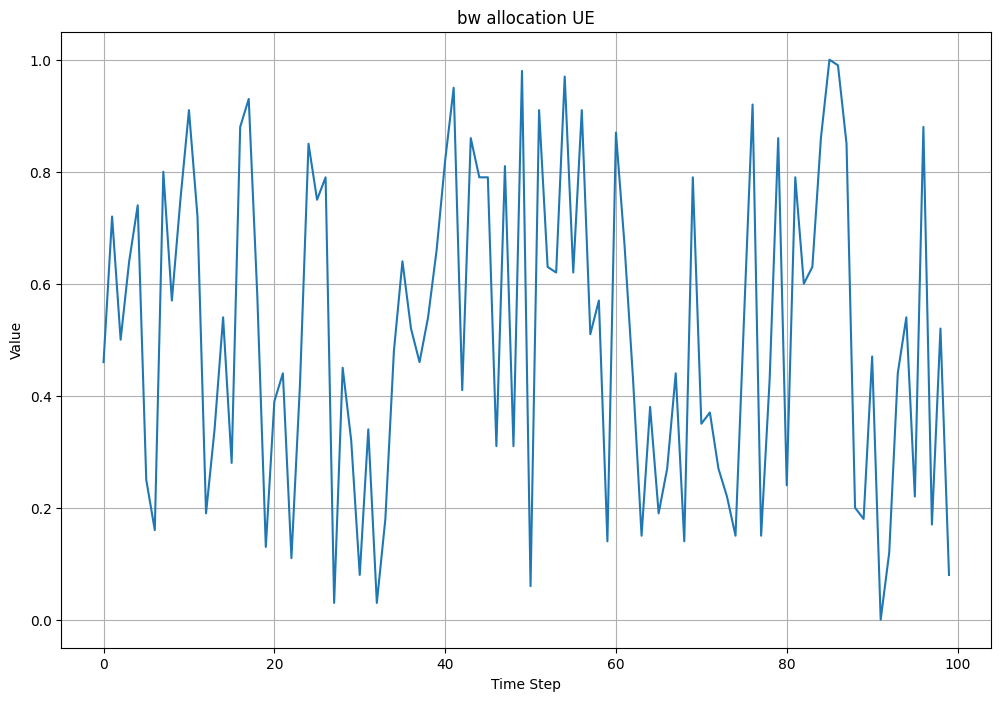

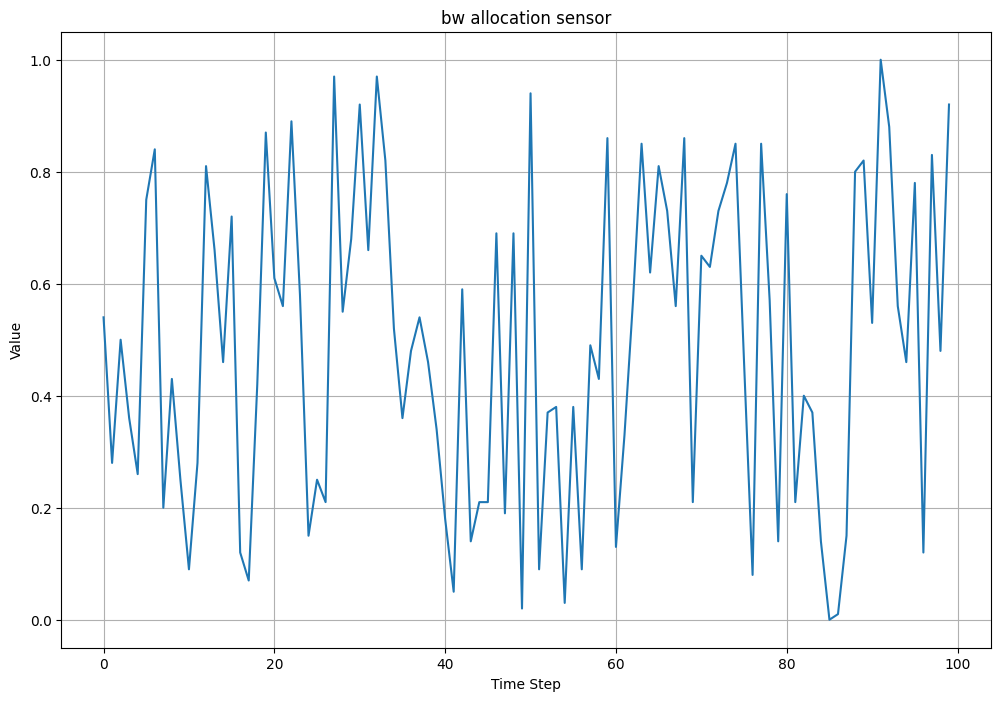

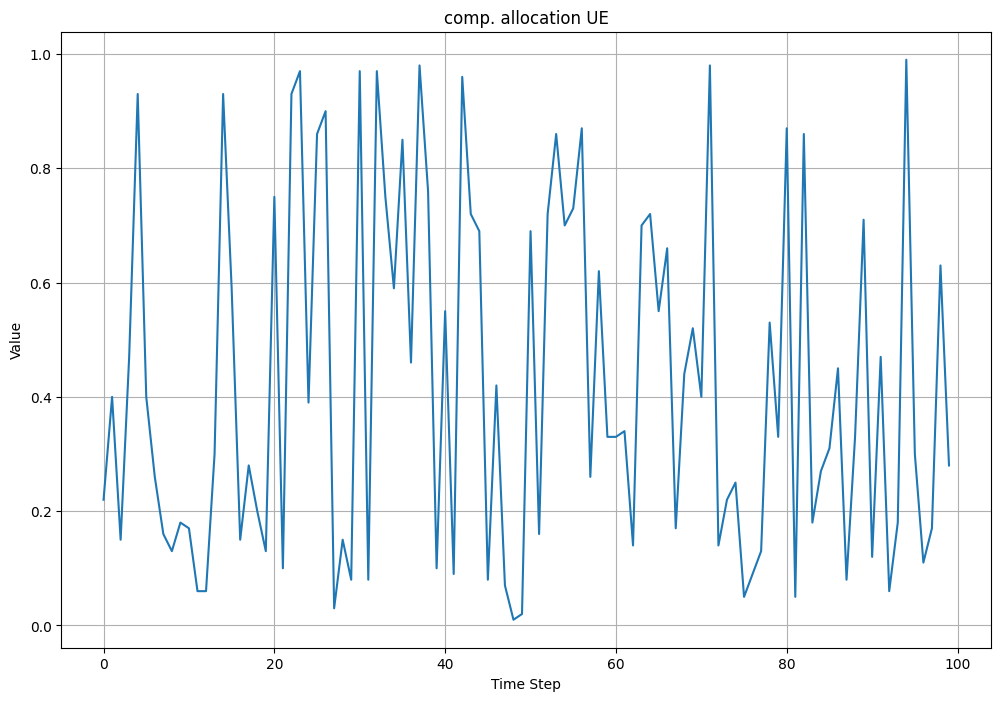

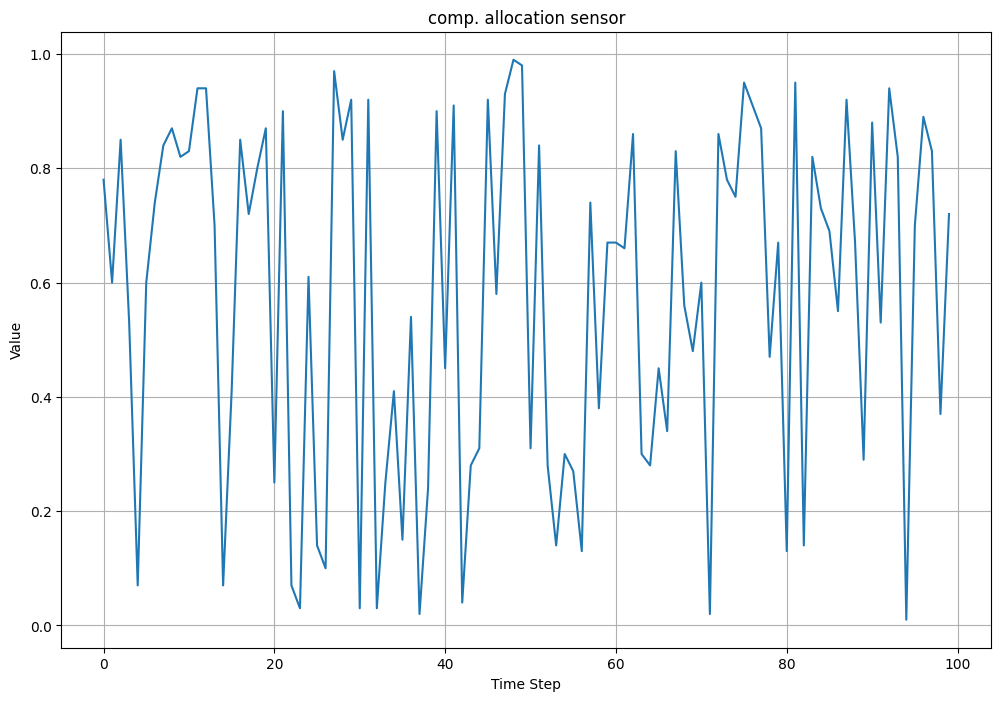

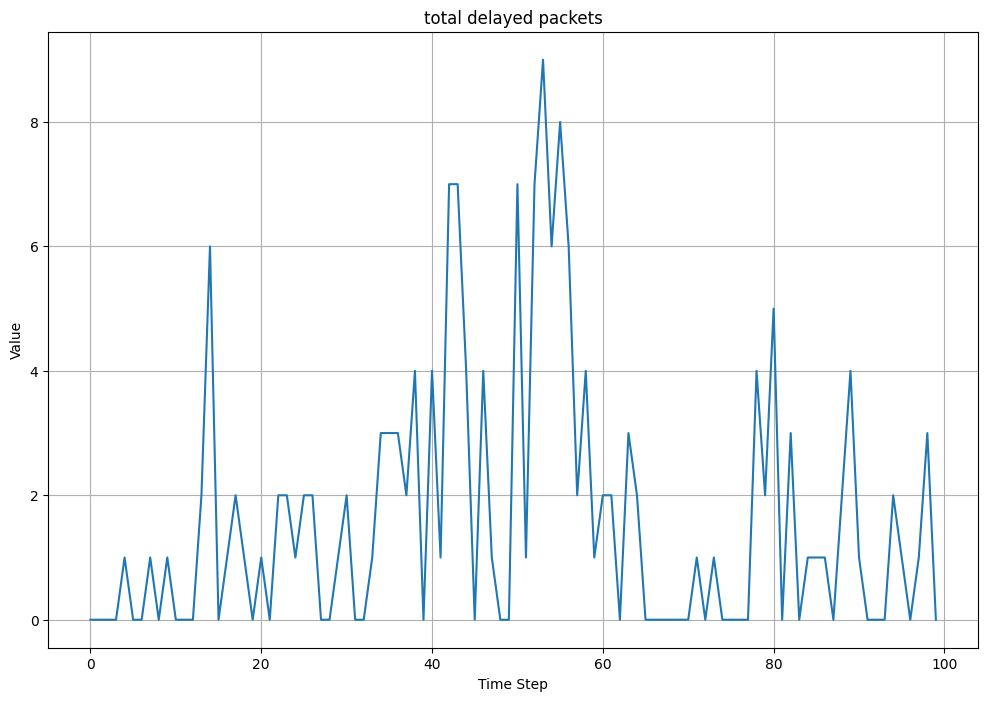

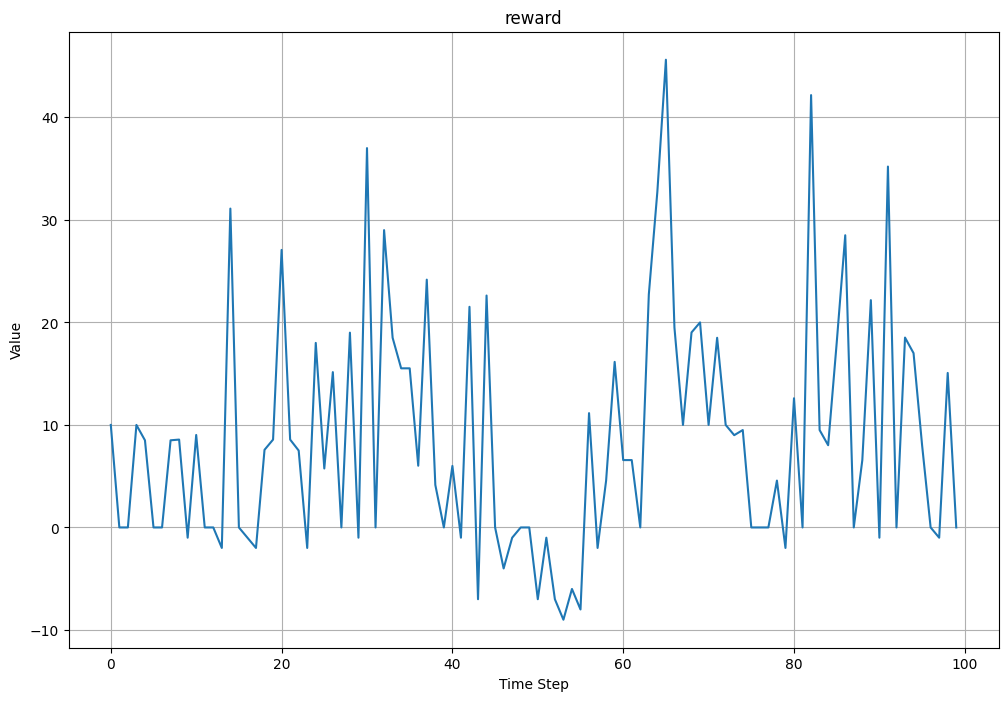

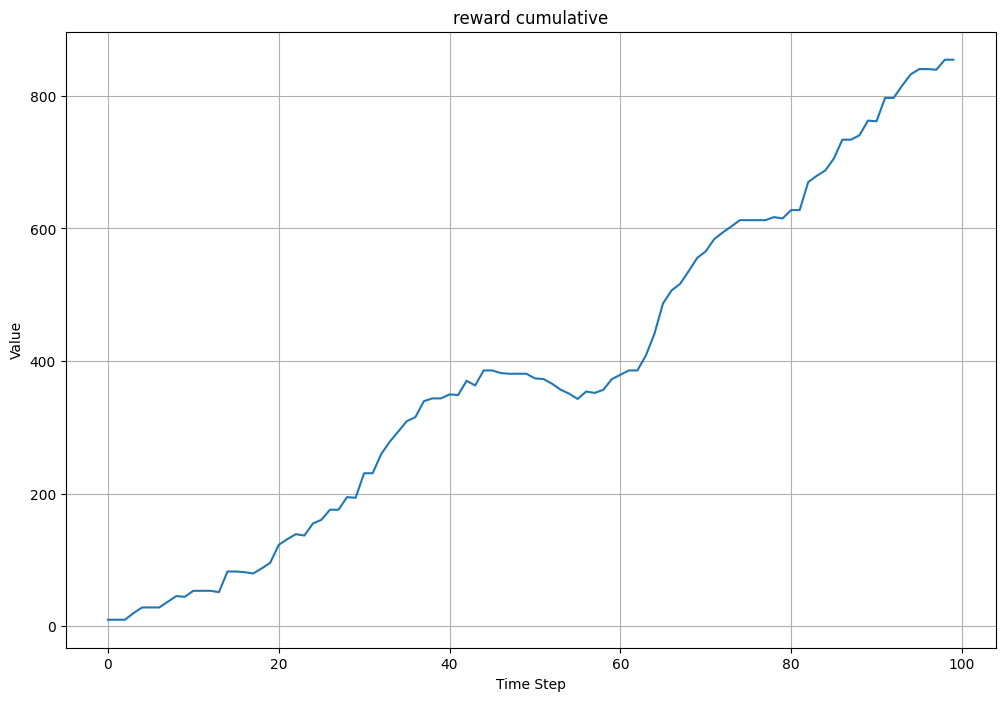

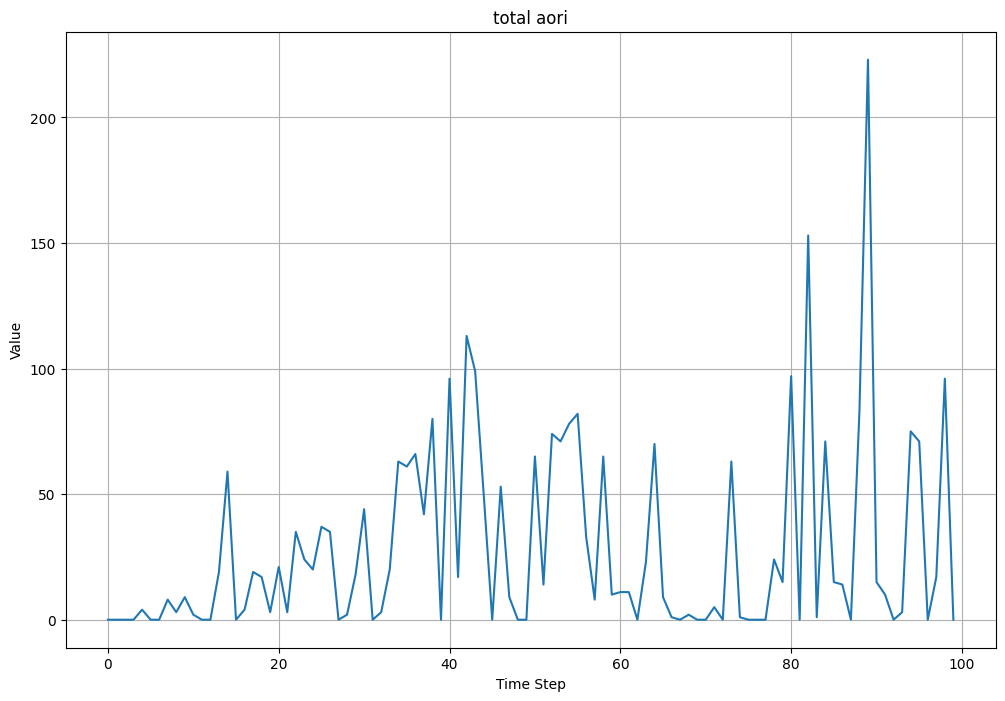

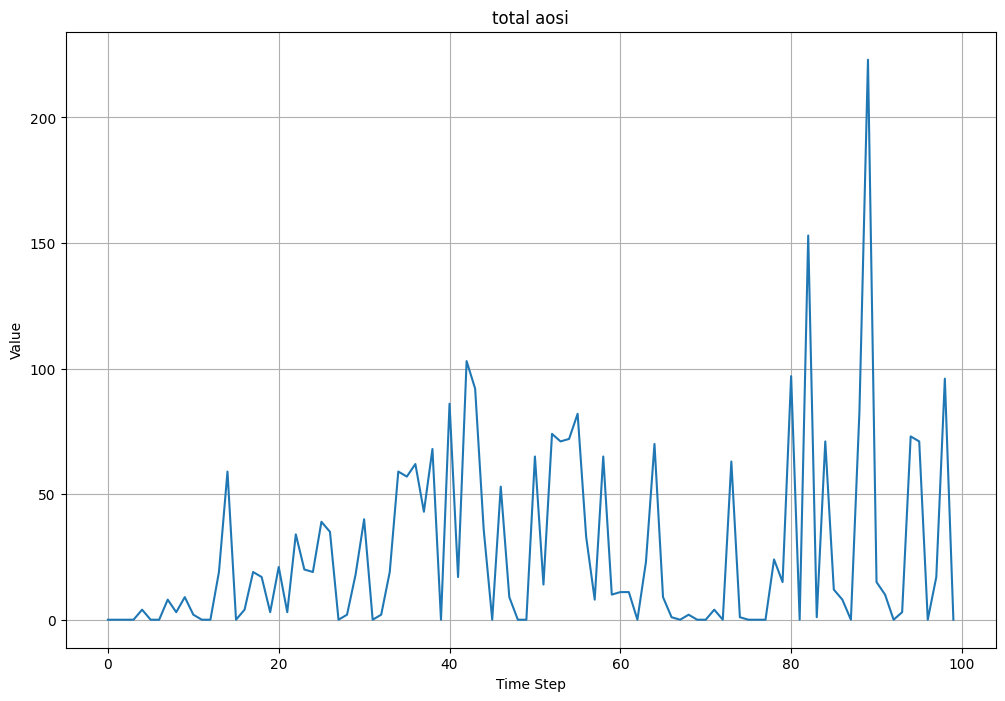

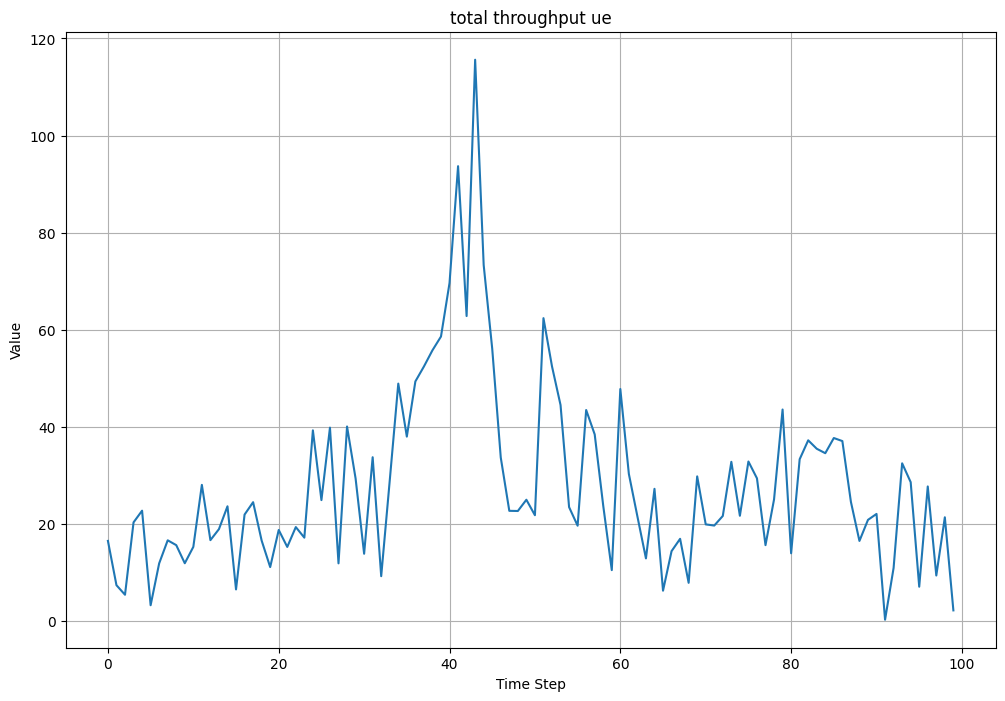

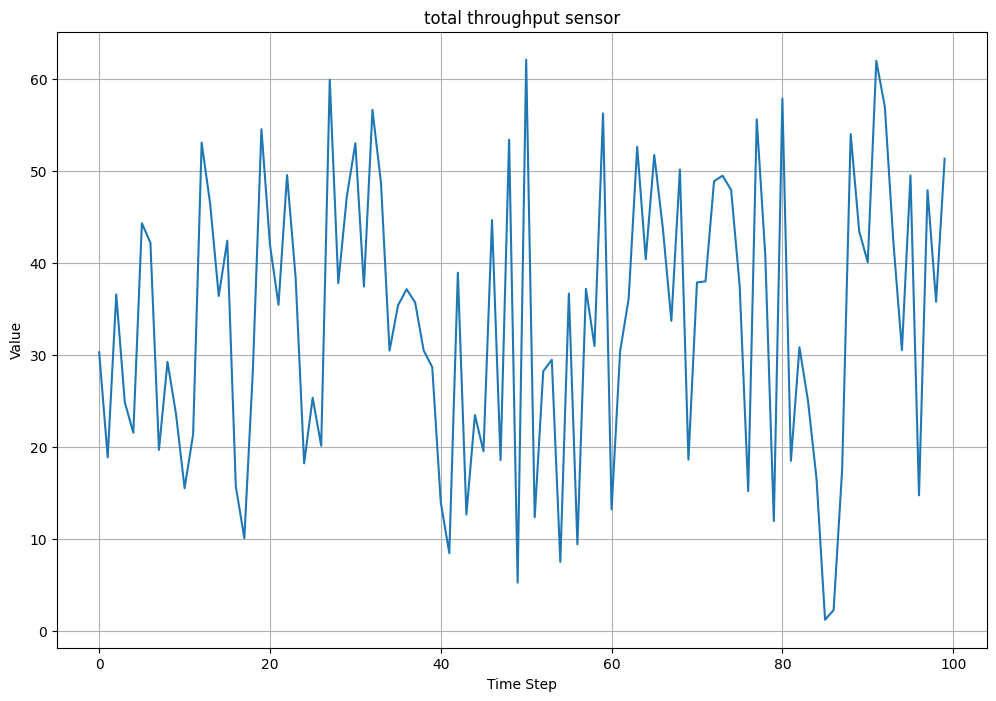

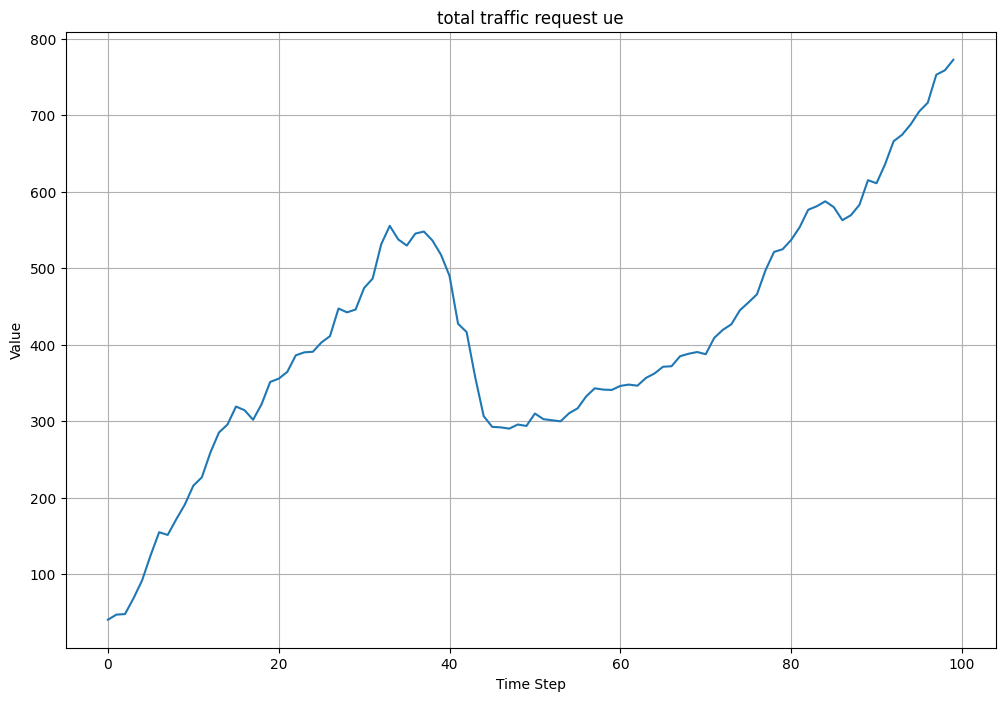

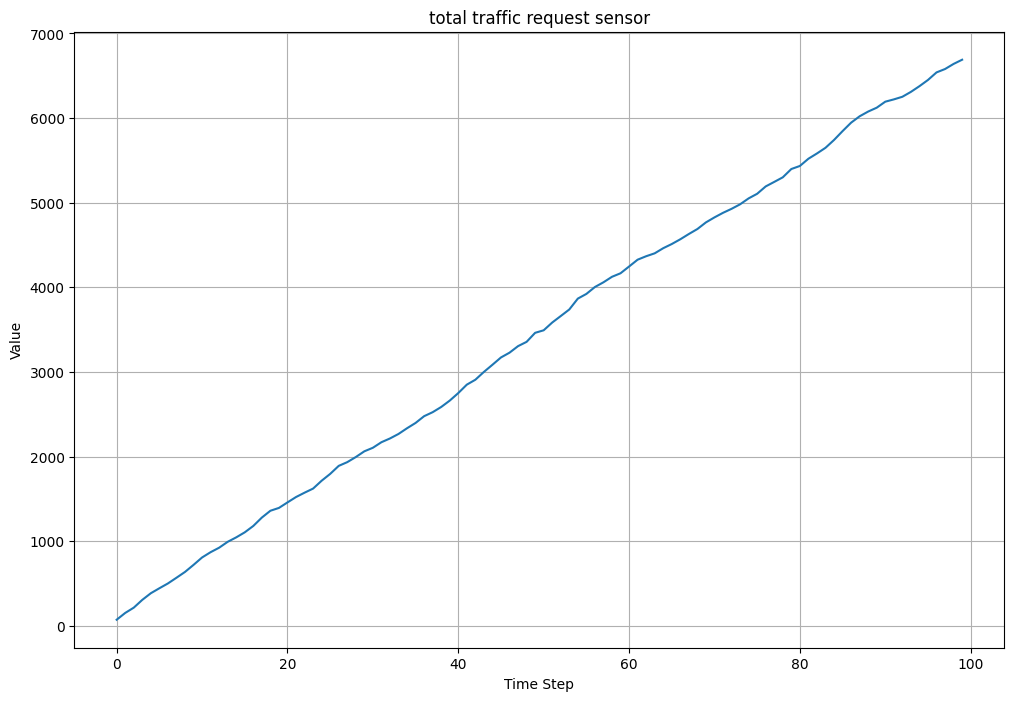

In [18]:
import matplotlib.pyplot as plt

def plot_kpi_metrics():
    # Plot kpi metrics
    for metric in kpi_results.columns:
        plt.figure(figsize=(12, 8))
        kpi_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_kpi_metrics()

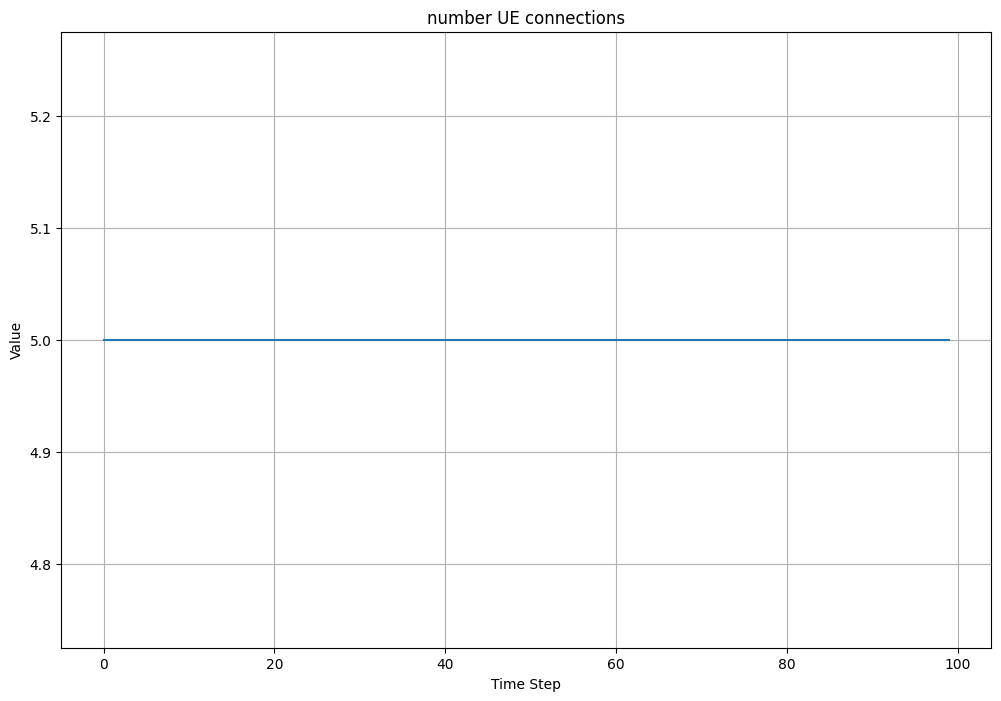

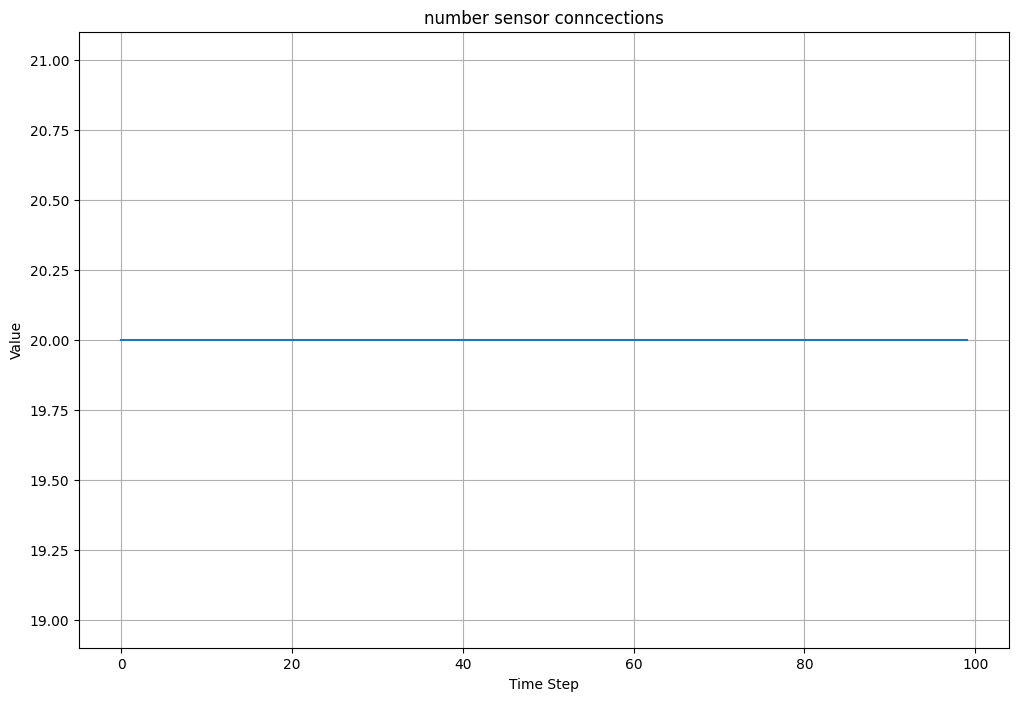

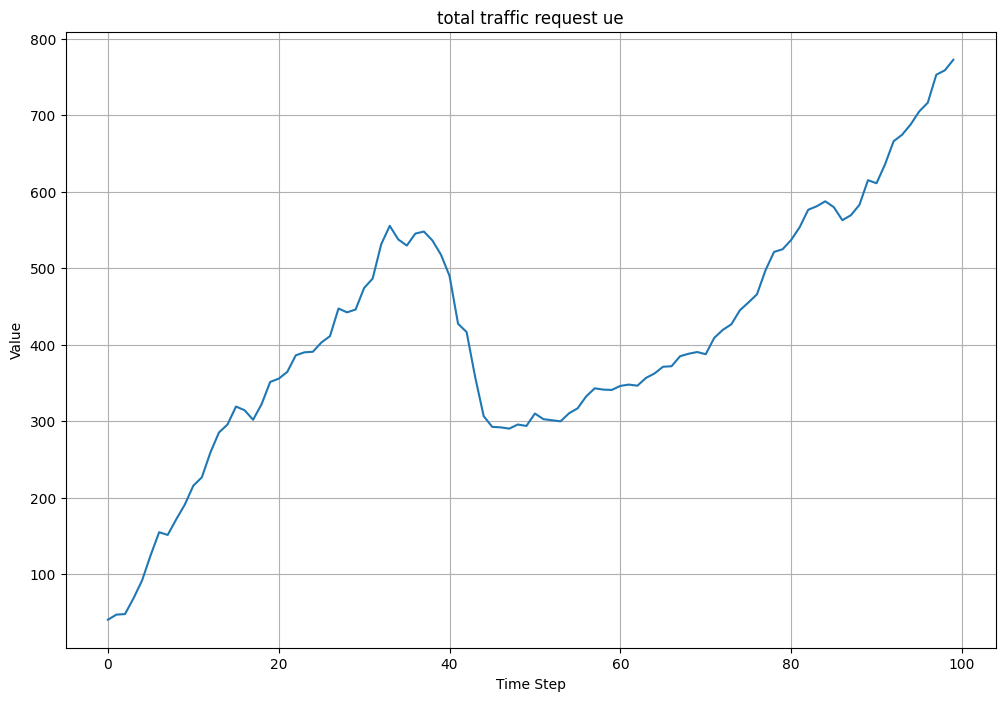

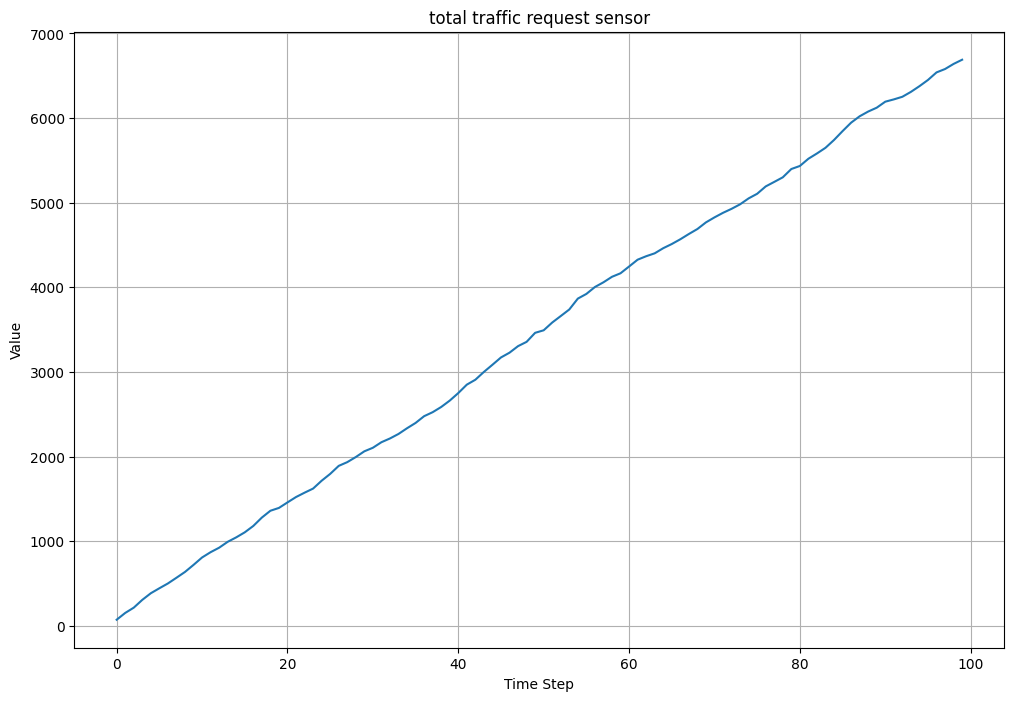

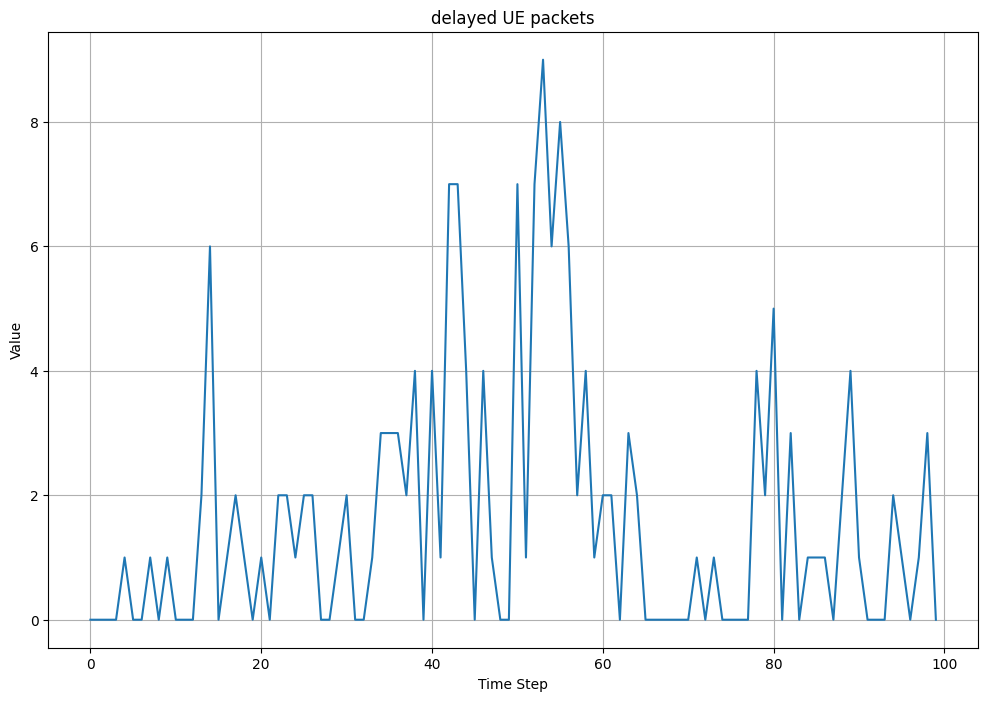

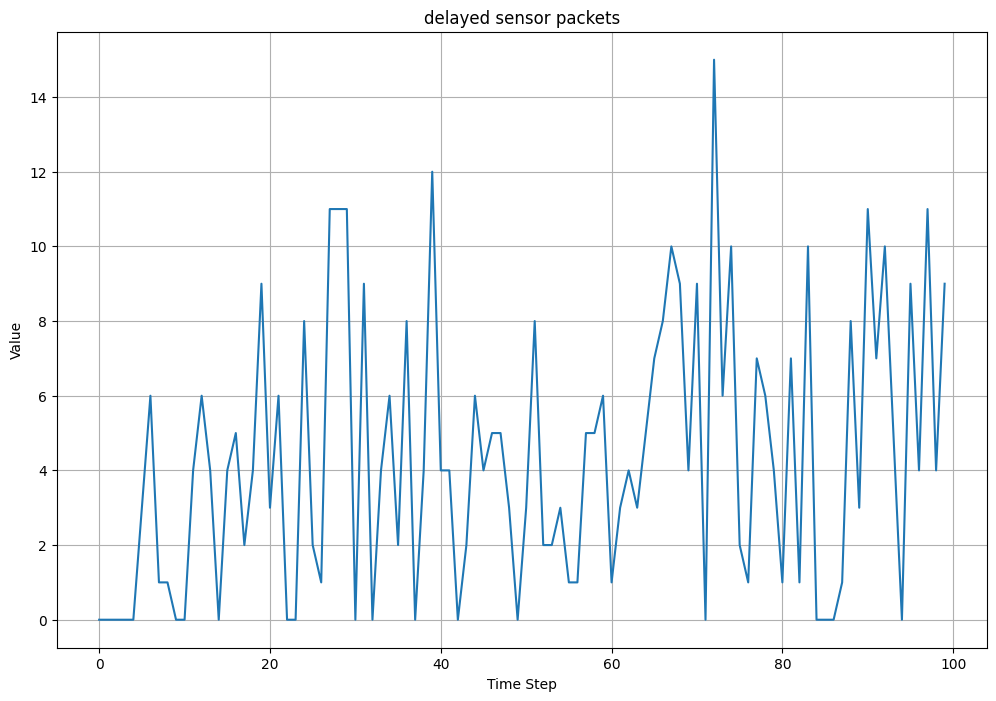

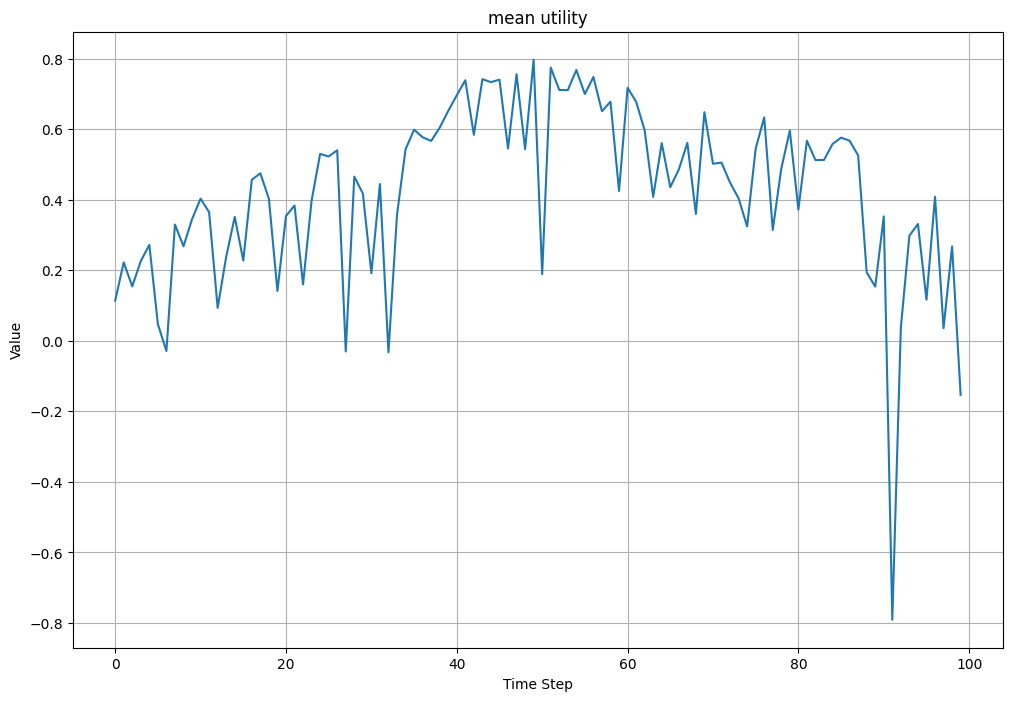

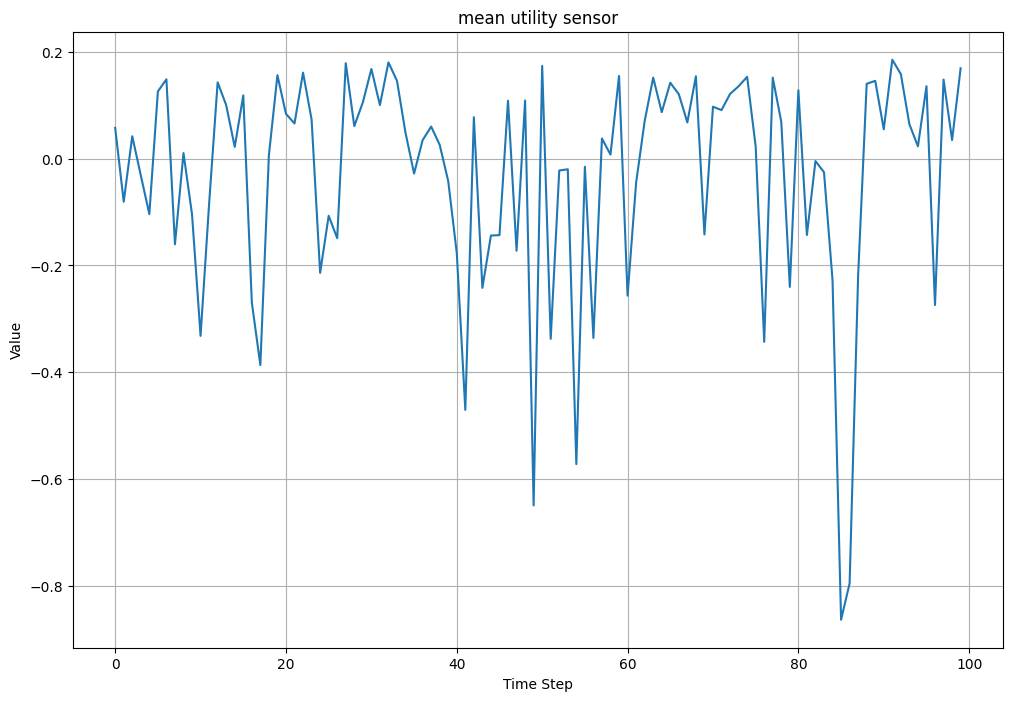

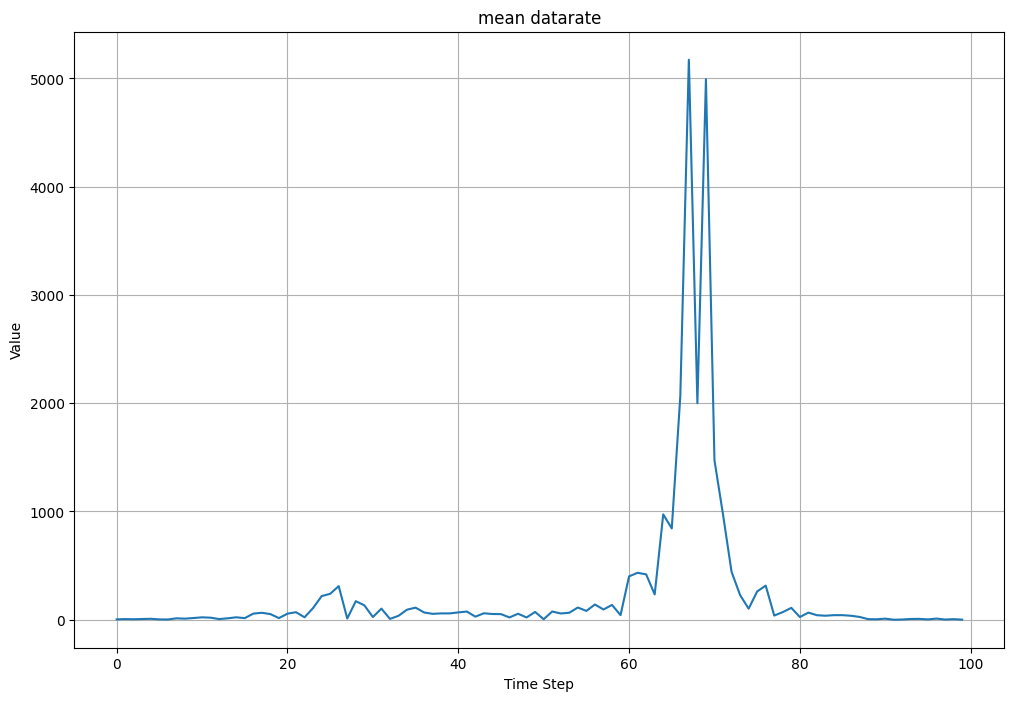

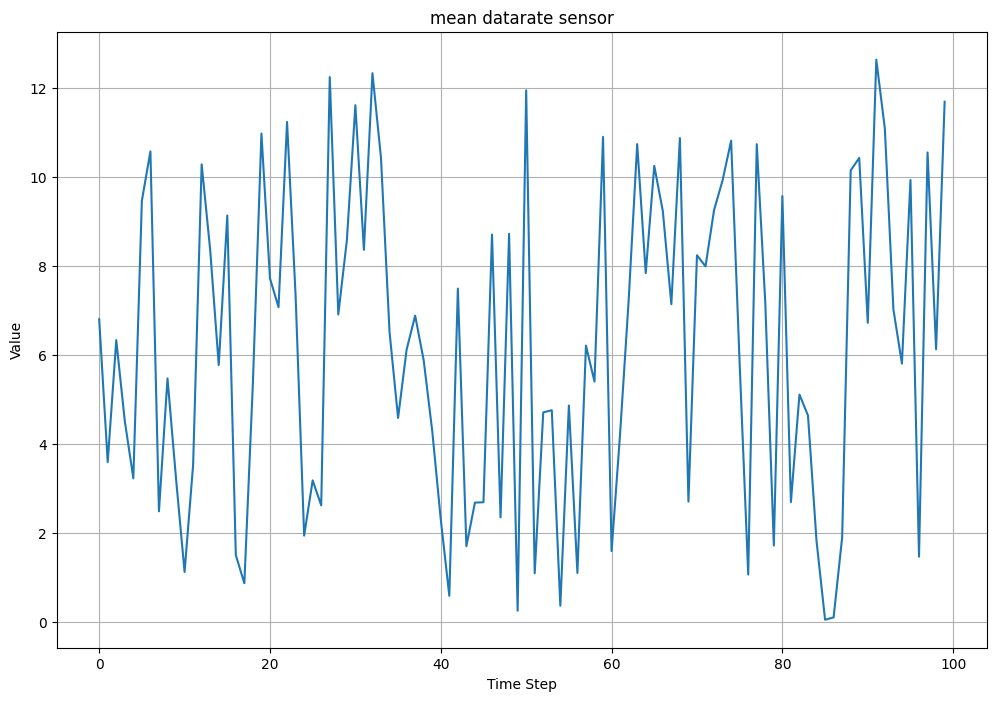

In [19]:
import matplotlib.pyplot as plt

def plot_scalar_metrics():
    # Plot scalar metrics
    for metric in scalar_results.columns:
        plt.figure(figsize=(12, 8))
        scalar_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_scalar_metrics()

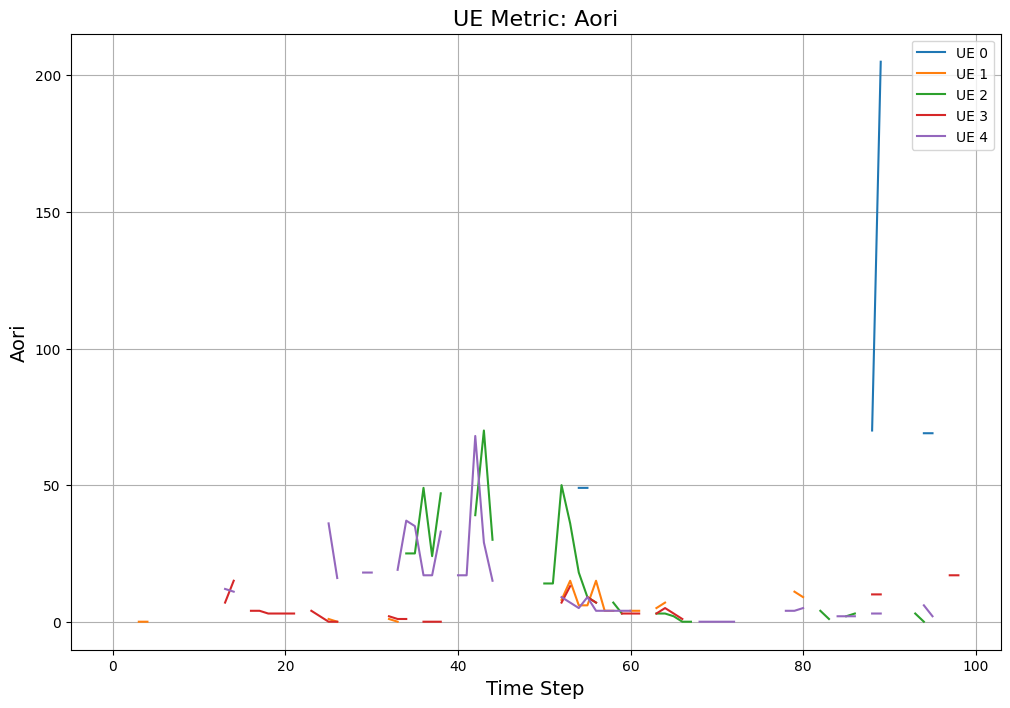

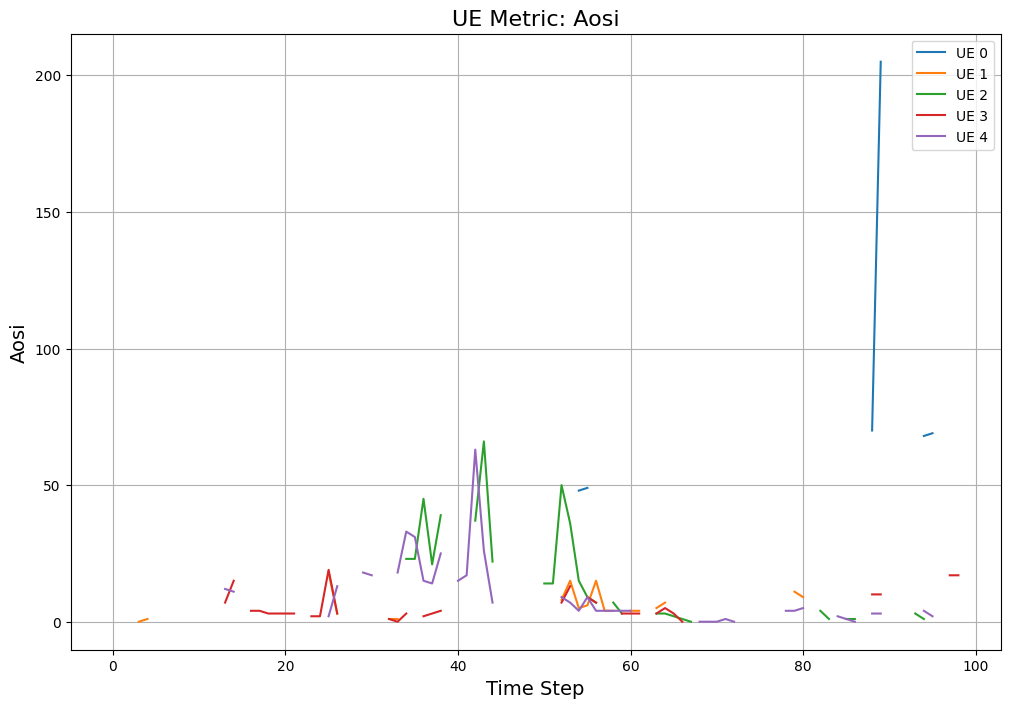

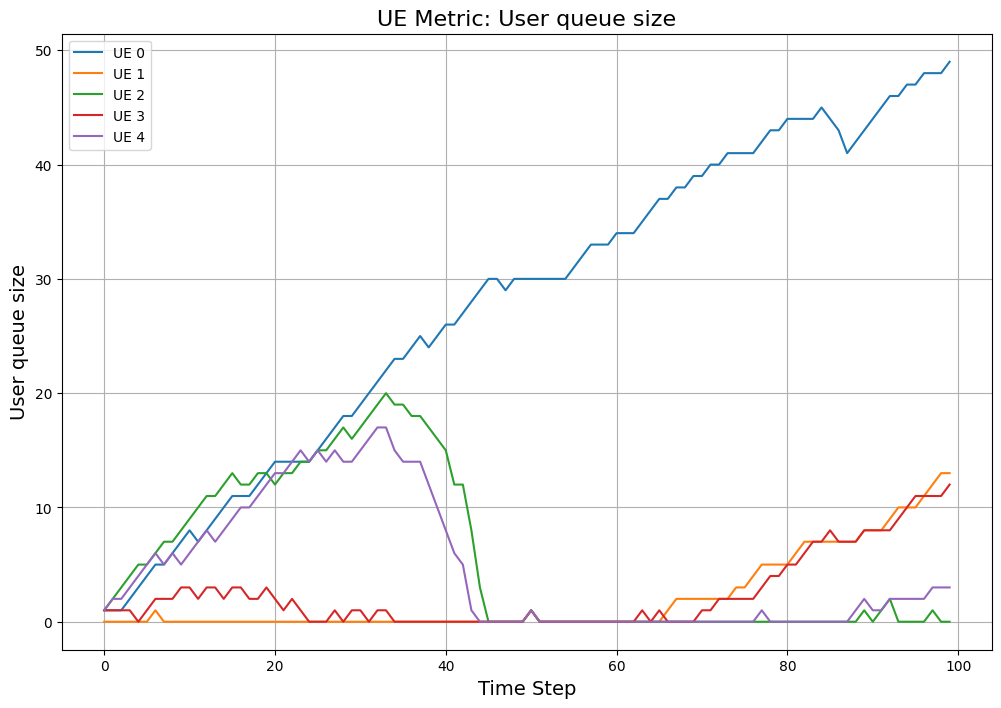

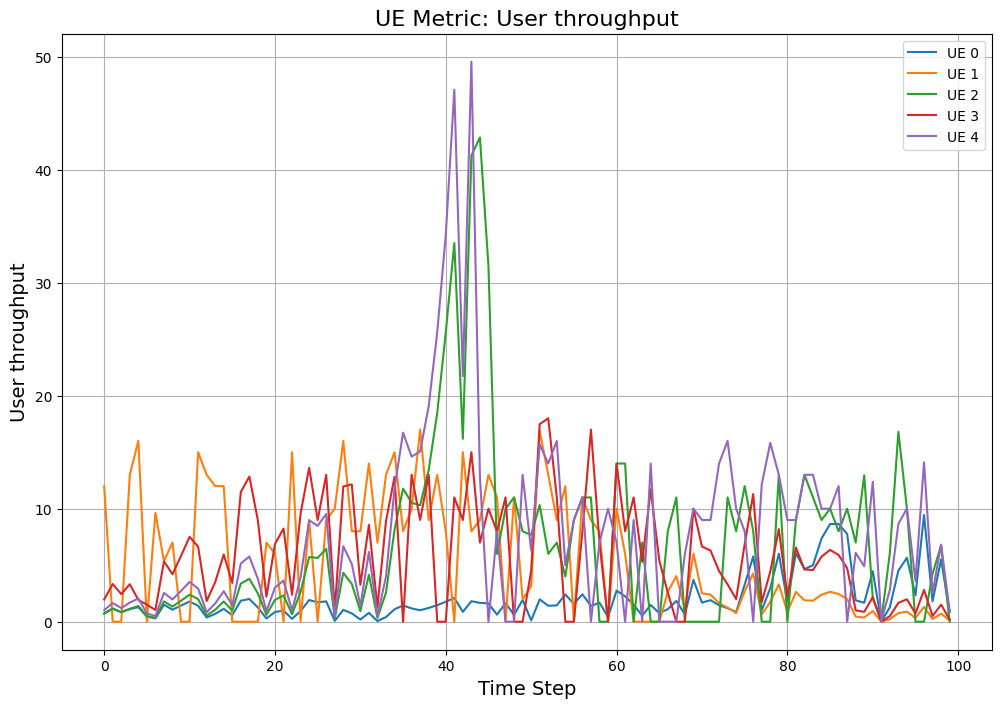

In [20]:
import matplotlib.pyplot as plt

def plot_ue_metrics(ue_results):
    required_metrics = ["user throughput", "user queue size", "AoRI", "AoSI"]
    available_metrics = [metric for metric in ue_results.columns if metric in required_metrics]

    for metric in available_metrics:
        plt.figure(figsize=(12, 8))
        
        for ue_id in ue_results.index.get_level_values("UE ID").unique():
            ue_data = ue_results.xs(ue_id, level="UE ID")[metric]
            plt.plot(ue_data.index, ue_data.values, label=f"UE {ue_id}")
            
        plt.title(f"UE Metric: {metric.capitalize()}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric.capitalize(), fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_ue_metrics(ue_results)

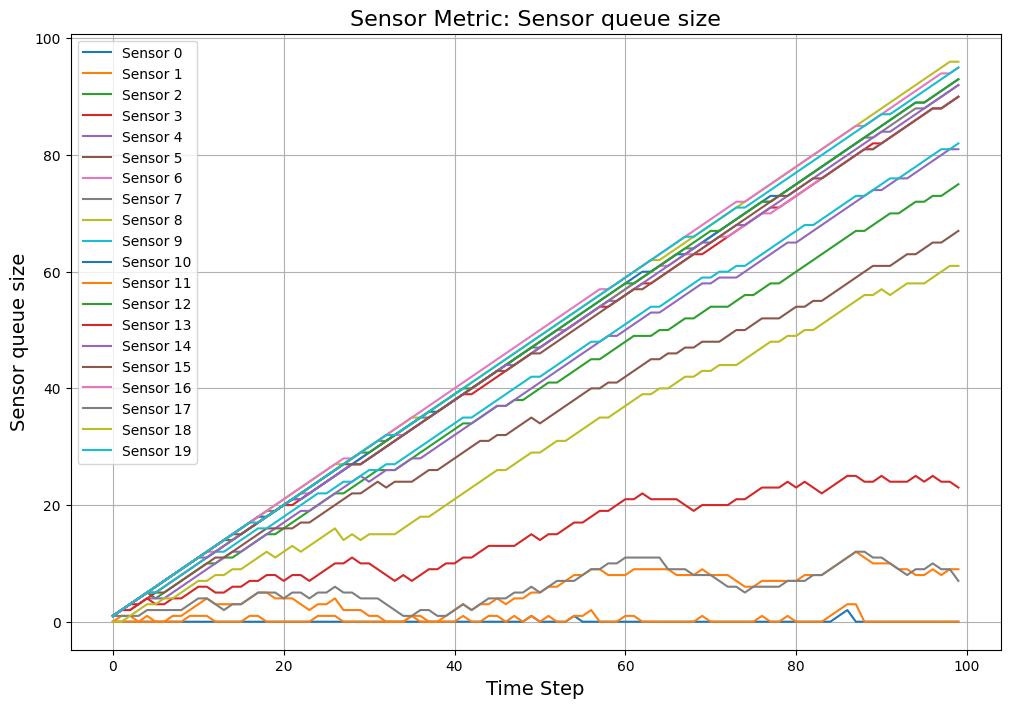

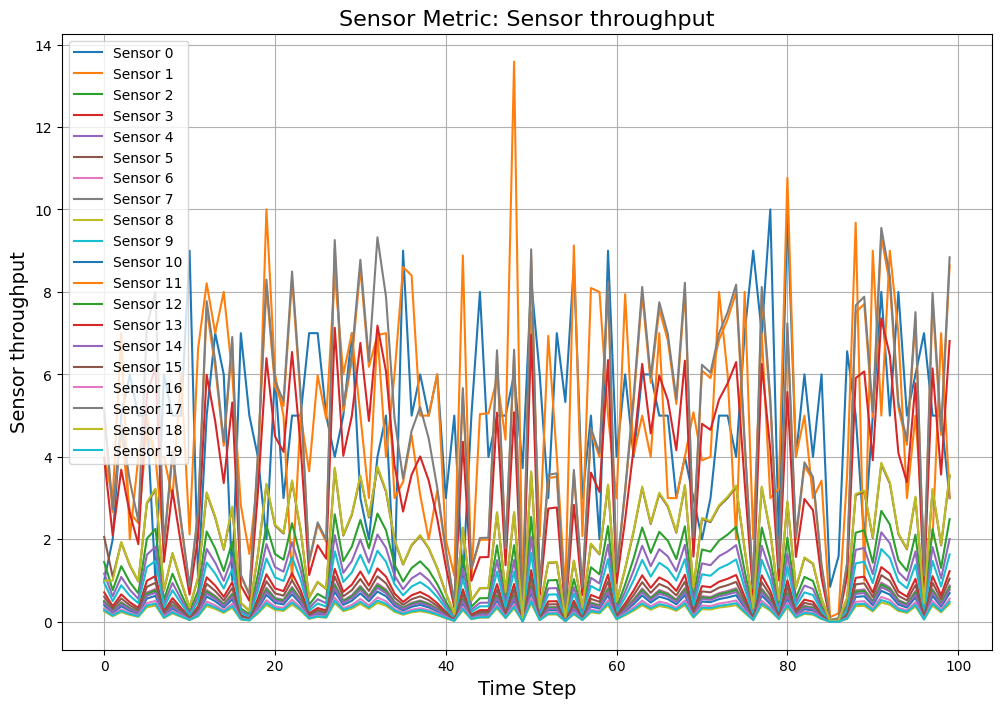

In [21]:
import matplotlib.pyplot as plt

def plot_sensor_metrics(ss_results):
    required_metrics = ["sensor throughput", "sensor queue size"]
    available_metrics = [metric for metric in ss_results.columns if metric in required_metrics]

    for metric in available_metrics:
        plt.figure(figsize=(12, 8))
        
        for sensor_id in ss_results.index.get_level_values("Sensor ID").unique():
            sensor_data = ss_results.xs(sensor_id, level="Sensor ID")[metric]
            plt.plot(sensor_data.index, sensor_data.values, label=f"Sensor {sensor_id}")
        
        plt.title(f"Sensor Metric: {metric.capitalize()}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric.capitalize(), fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_sensor_metrics(ss_results)

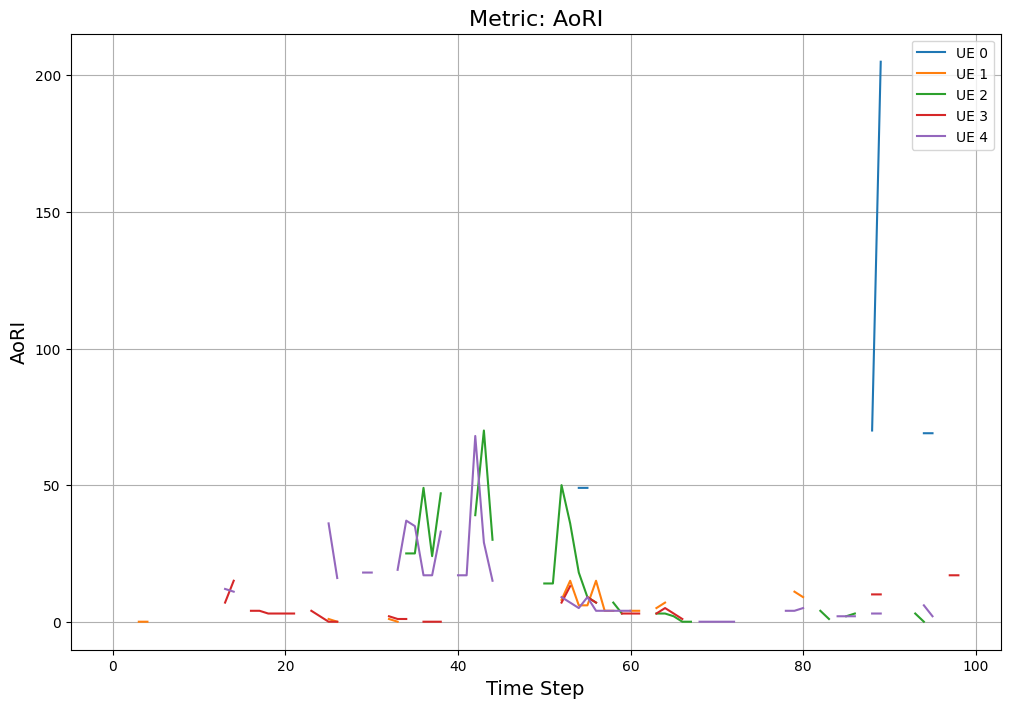

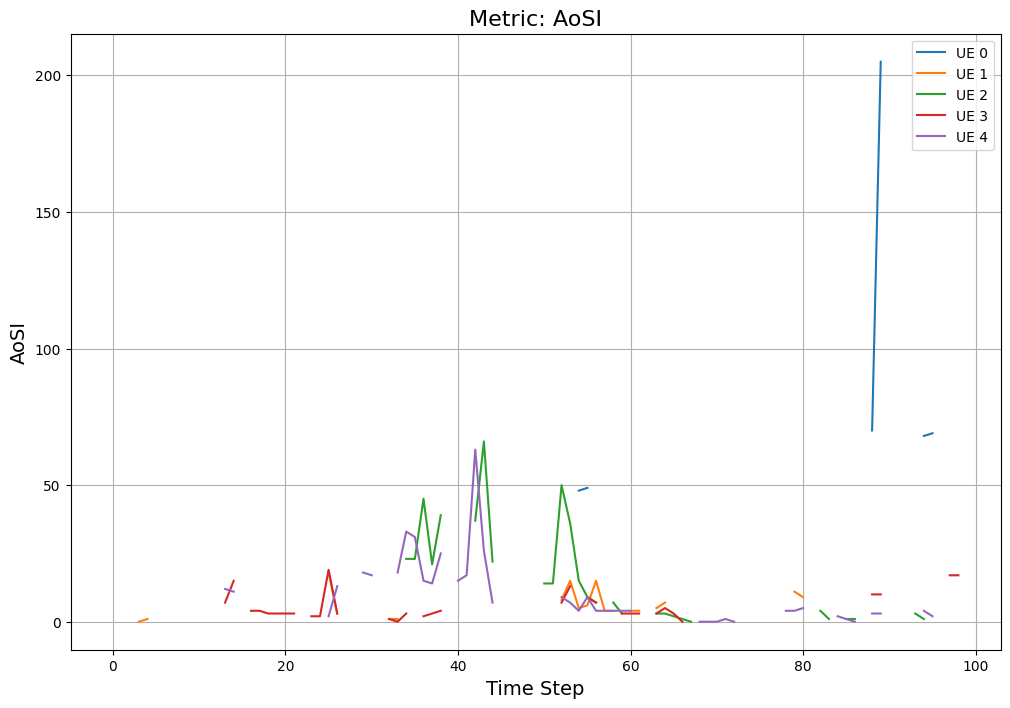

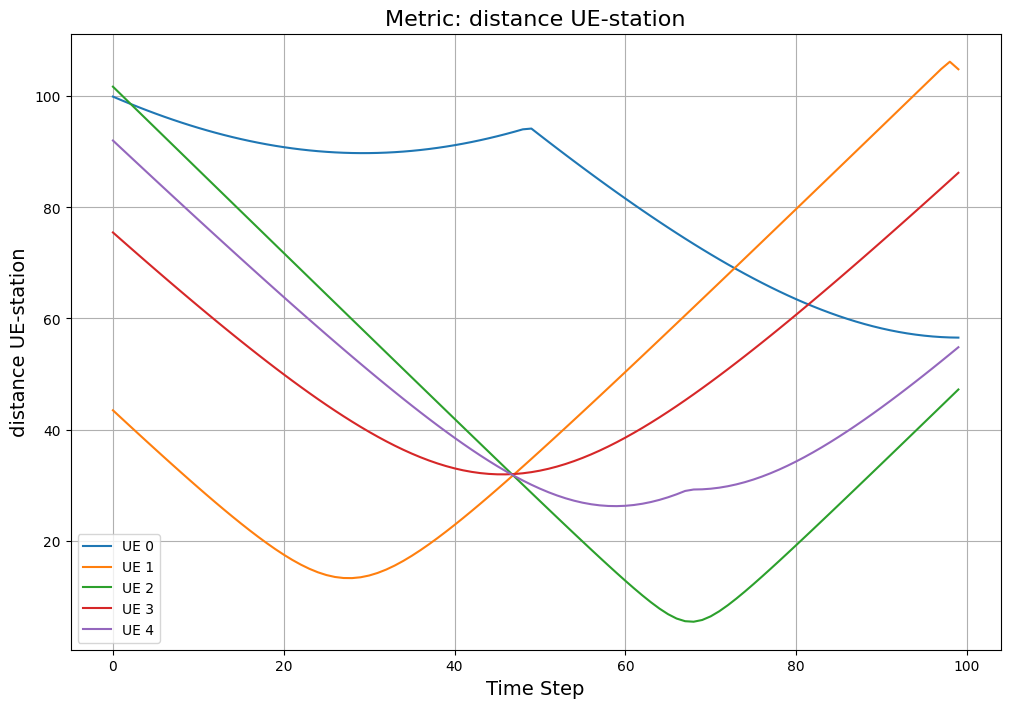

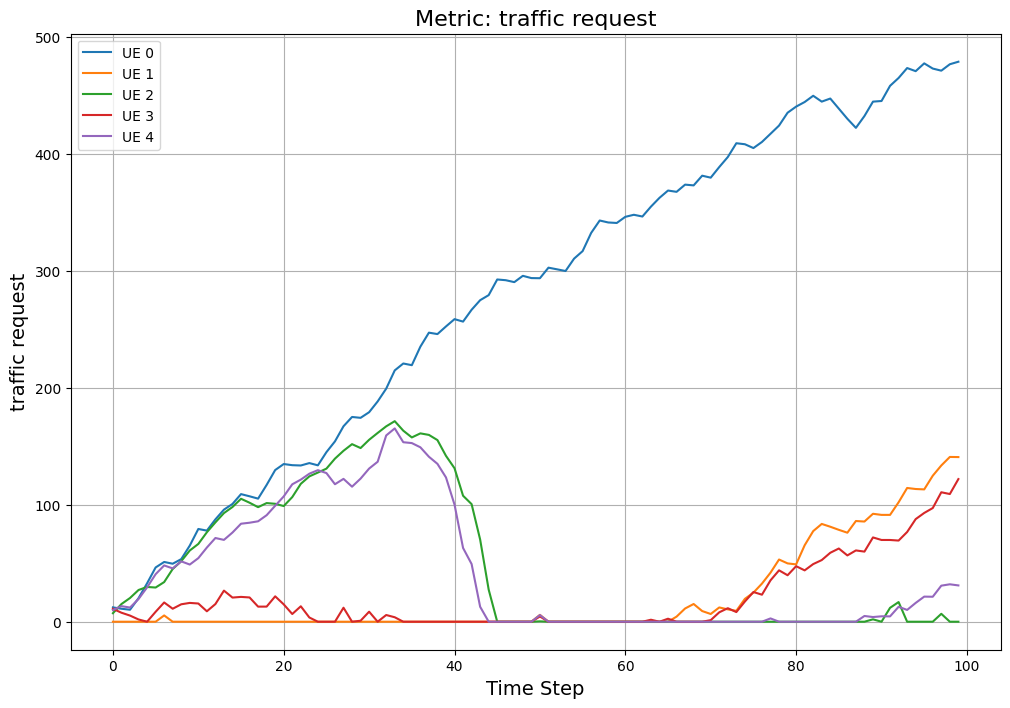

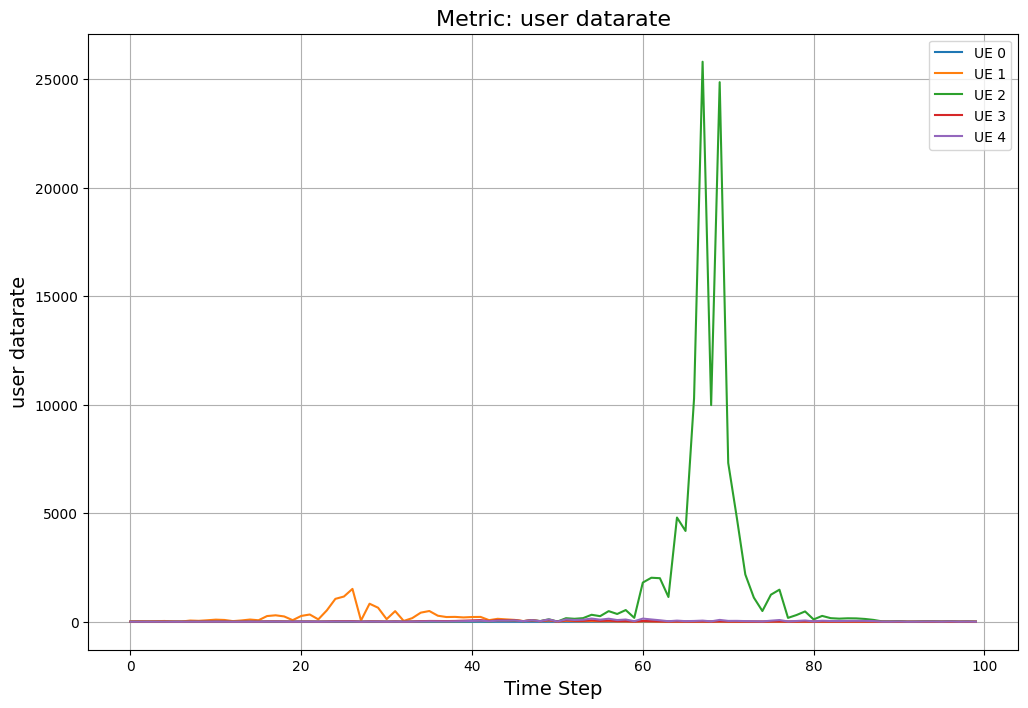

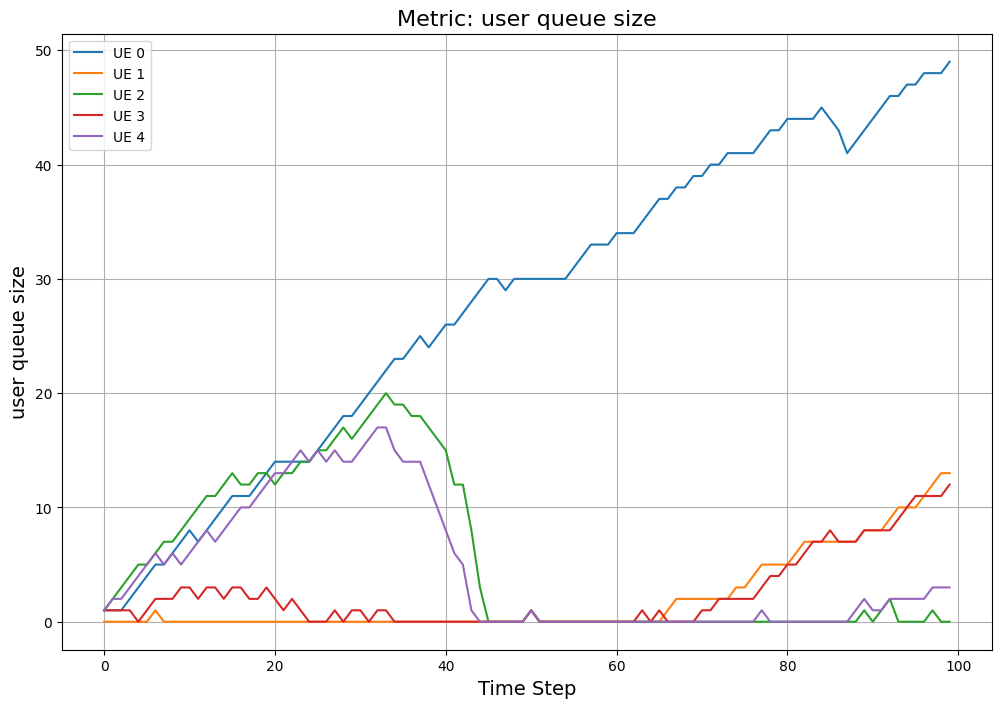

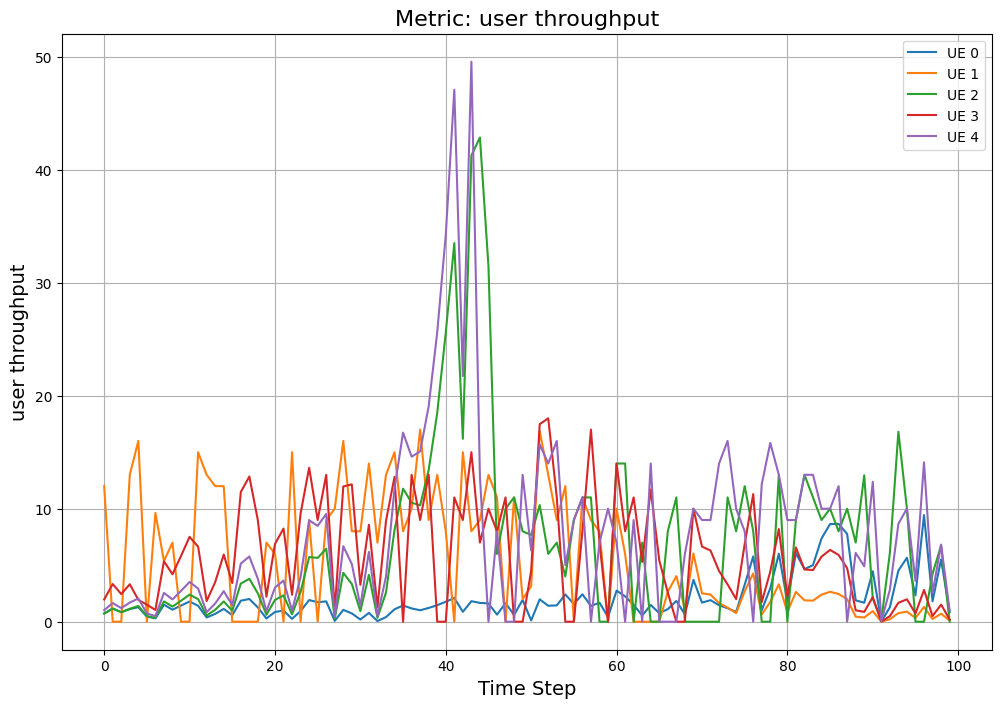

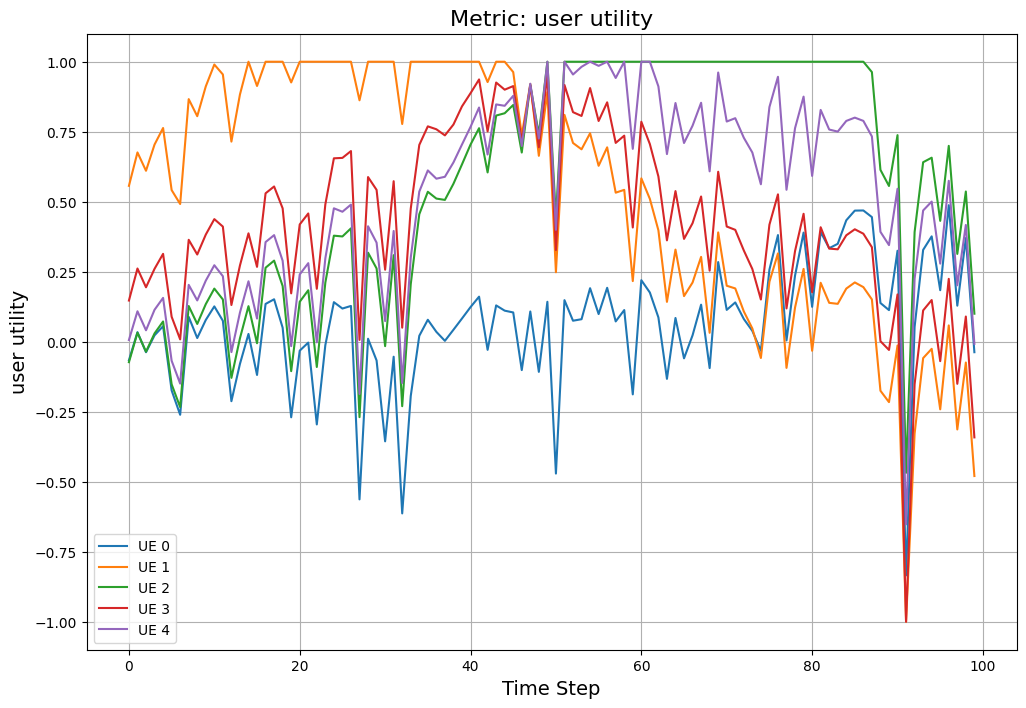

In [22]:
import matplotlib.pyplot as plt

def plot_all_ue_metrics(ue_results):
    for metric in ue_results.columns:
        plt.figure(figsize=(12, 8))
        
        for ue_id in ue_results.index.get_level_values("UE ID").unique():
            ue_data = ue_results.xs(ue_id, level="UE ID")[metric]
            plt.plot(ue_data.index, ue_data.values, label=f"UE {ue_id}")
        
        plt.title(f"Metric: {metric}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_all_ue_metrics(ue_results)

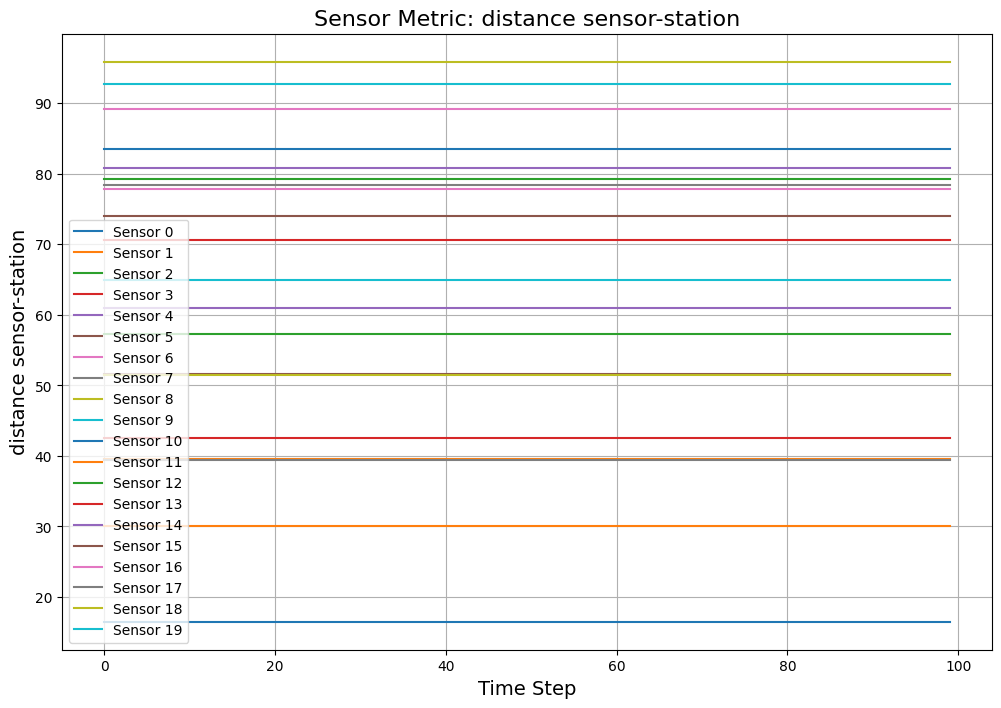

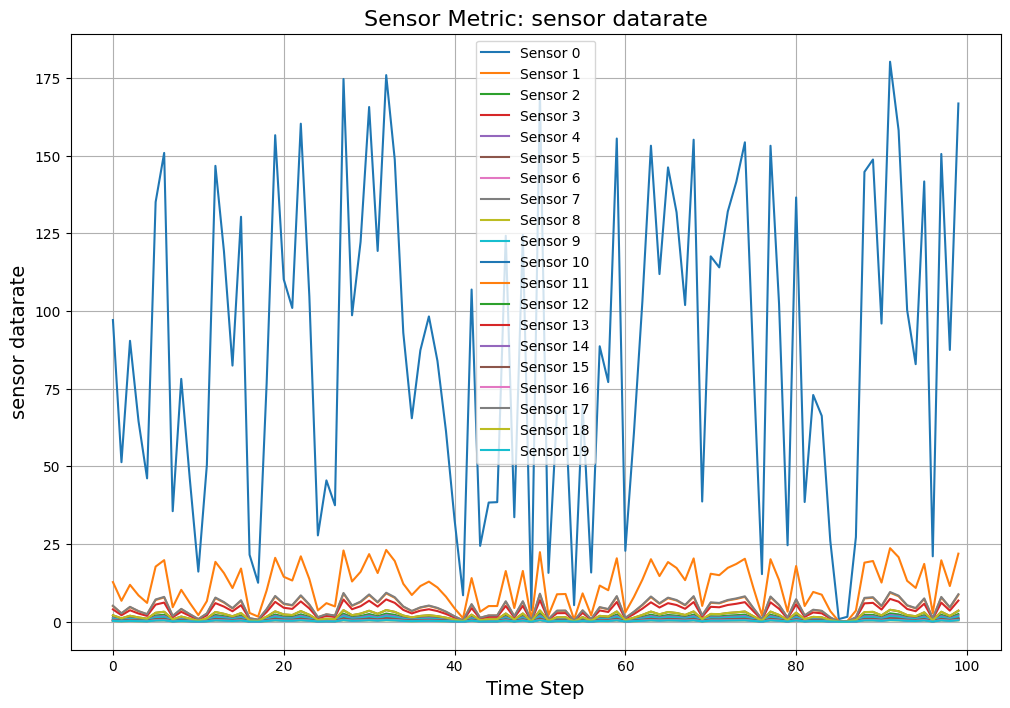

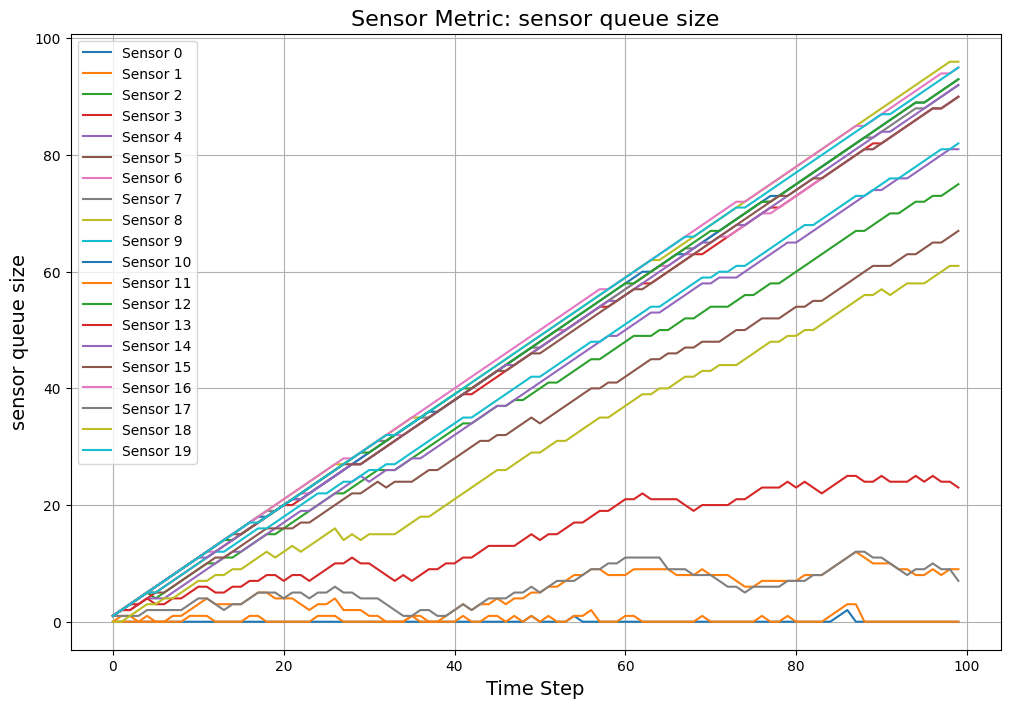

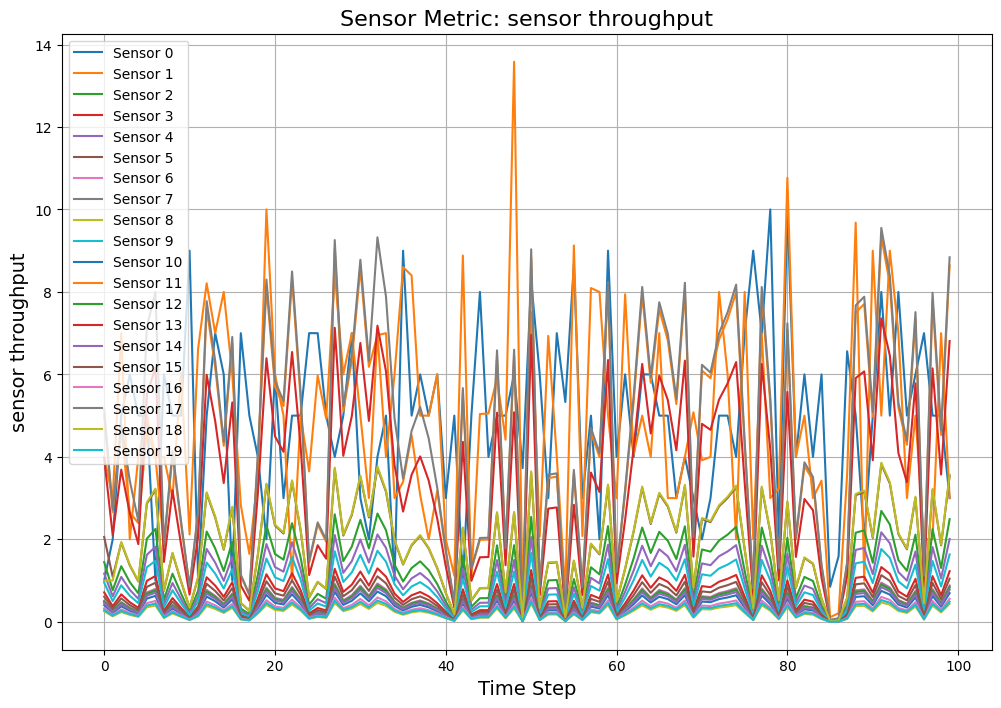

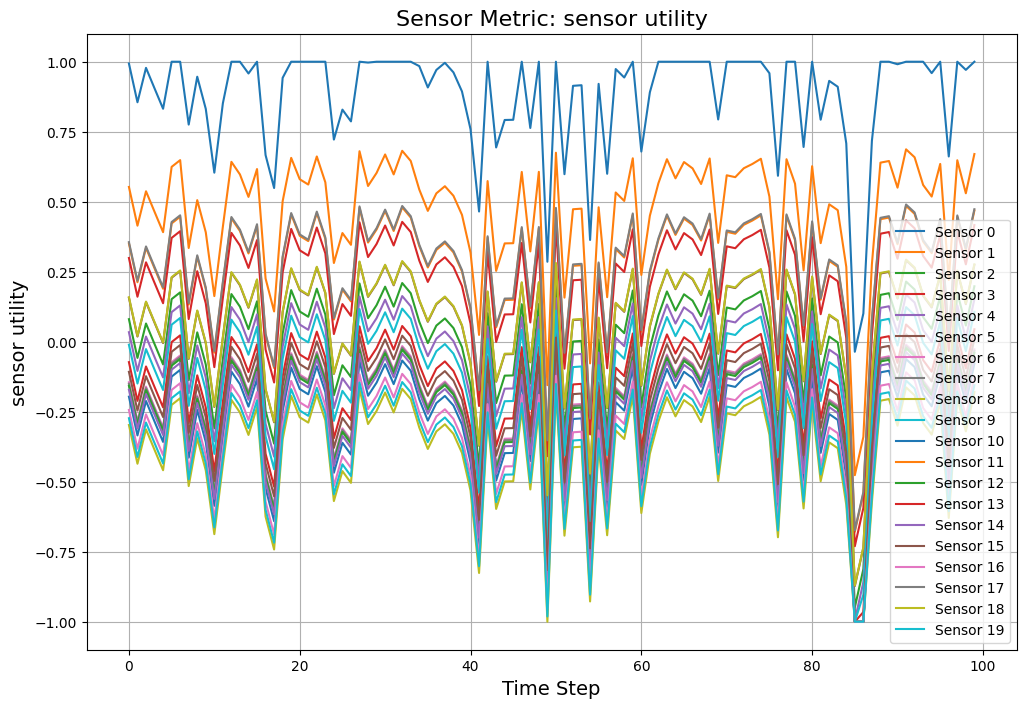

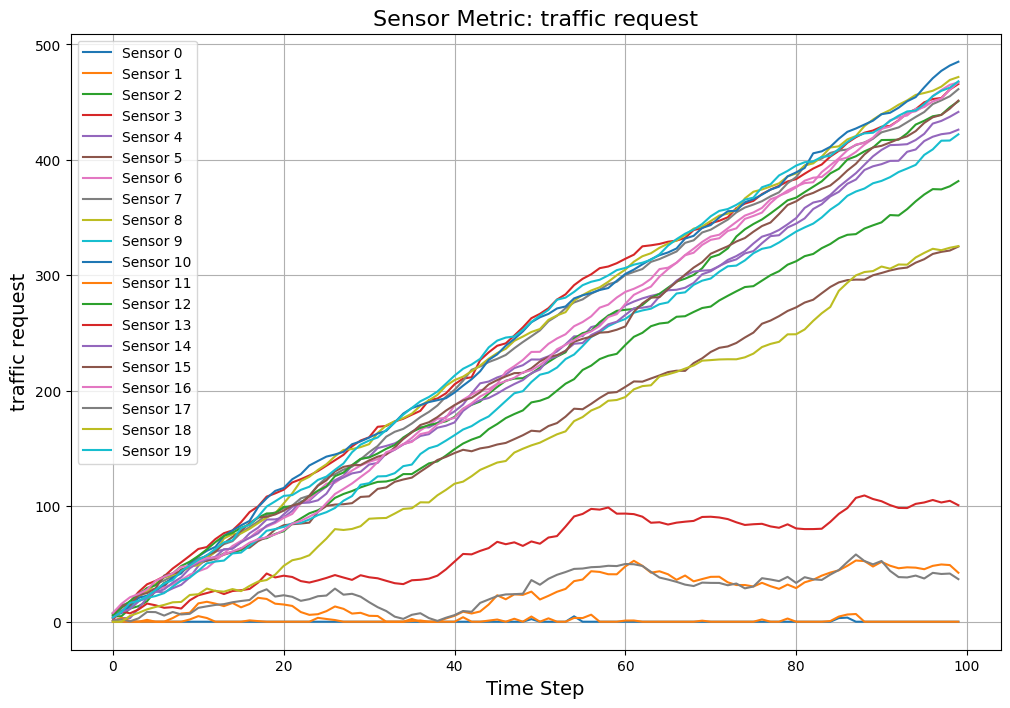

In [23]:
import matplotlib.pyplot as plt

def plot_all_sensor_metrics(ss_results):
    for metric in ss_results.columns:
        plt.figure(figsize=(12, 8))
    
        for sensor_id in ss_results.index.get_level_values("Sensor ID").unique():
            sensor_data = ss_results.xs(sensor_id, level="Sensor ID")[metric]
            plt.plot(sensor_data.index, sensor_data.values, label=f"Sensor {sensor_id}")
        
        plt.title(f"Sensor Metric: {metric}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_all_sensor_metrics(ss_results)